<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Diccionario_de_camas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests 


%matplotlib inline
import matplotlib as mpl
#plt.style.use('seaborn-whitegrid')
import numpy as np


In [ ]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

# Source URL (not available outside Peru)
# http://datos.susalud.gob.pe/dataset/data-hist%C3%B3rica-del-registro-de-camas-diarias-disponibles-y-ocupadas-del-formato-f5002-0#{}
# http://datos.susalud.gob.pe/node/223/download

url_SUSALUD_CamasFile="Camas_SUSALUD.csv"
download_url("https://socios.spc.org.pe/ytupac/COVID-19/data/"+url_SUSALUD_CamasFile, url_SUSALUD_CamasFile)
df = pd.read_csv(url_SUSALUD_CamasFile, sep='|')

#df = pd.read_csv('Camas_26-01-2021.csv', sep='|')
df['FECHA'] = pd.to_datetime(df['FECHA_REGISTRO'], format='%Y%m%d')
df.tail()

#Define cut date (because database is not complete (zero-values) in current day in some regions)
fechaCorte = '2021-03-24'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186072 entries, 0 to 186071
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   CORRELATIVO                            186072 non-null  int64         
 1   FECHA_CORTE                            186072 non-null  int64         
 2   FECHA_REGISTRO                         186072 non-null  int64         
 3   INSTITUCION                            186046 non-null  object        
 4   UBIGEO                                 186046 non-null  float64       
 5   REGION                                 186046 non-null  object        
 6   PROVINCIA                              186046 non-null  object        
 7   CATEGORIA                              186046 non-null  object        
 8   CODIGO                                 186072 non-null  int64         
 9   NOMBRE                                 186046 no

In [ ]:
df['TOTAL_CAMAS'] = df['CAMAS_ZC_TOTAL'] + \
                    df['CAMAS_ZNC_TOTAL'] + \
                    df['UCI_ADULTOS_CAMAS_TOTAL'] + \
                    df['UCI_PEDIATRIA_CAMAS_TOTAL'] + \
                    df['UCIN_CAMAS_TOTAL'] + \
                    df['CAMAS_HOSP_TOTAL']

df['TOTAL_CAMAS_DISPONIBLES'] = df['CAMAS_ZC_DISPONIBLES'] + \
                    df['CAMAS_ZNC_DISPONIBLE'] + \
                    df['UCI_ADULTOS_CAMAS_DISPONIBLE'] + \
                    df['UCI_PEDIATRIA_CAMAS_DISPONIBLE'] + \
                    df['UCIN_CAMAS_DISPONIBLE'] + \
                    df['CAMAS_HOSP_DISPONIBLE']

df['TOTAL_CAMAS_OCUPADAS'] = df['CAMAS_ZC_OCUPADOS'] + \
                    df['CAMAS_ZNC_OCUPADOS'] + \
                    df['UCI_ADULTOS_CAMAS_OCUPADAS'] + \
                    df['UCI_PEDIATRIA_CAMAS_OCUPADAS'] + \
                    df['UCIN_CAMAS_OCUPADAS'] + \
                    df['CAMAS_HOSP_OCUPADAS']

# Totales Perú

In [ ]:
df_all_regions = df.sort_values('FECHA')
df_all_regions = df_all_regions[df_all_regions['FECHA'] <= fechaCorte]
df_all_regions.reset_index(inplace=True, drop=True)
df_all_regions.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
185954,185417,20210324,20210324,Privado,110101.0,ICA,ICA,II-E,9627,SAN MARTIN,Si,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,7,7,0
185955,185414,20210324,20210324,EsSalud,160401.0,LORETO,MARISCAL RAMON CASTILLA,I-3,11556,CENTRO DE ATENCION PRIMARIA II CABALLOCOCHA,Si,0,0,0,2,13,15,0,0,0,0,0,0,0,0,0,5,10,15,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,30,23,7
185956,185416,20210324,20210324,Privado,40126.0,AREQUIPA,AREQUIPA,II-E,12692,OFTALMOLOGIA AVANZADA,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,0,0,0
185957,185240,20210324,20210324,Gob Regional,130401.0,LA LIBERTAD,CHEPEN,II-1,5299,HOSPITAL DE APOYO CHEPEN,Si,0,0,0,10,32,42,0,0,0,0,0,0,0,0,0,5,25,30,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,72,57,15
185958,185418,20210324,20210324,Privado,150131.0,LIMA,LIMA,II-E,9505,OFTALMOSALUD,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,0,0,0


In [ ]:
df_all_regions_sin_duplicados = df_all_regions.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_all_regions_sin_duplicados = df_all_regions_sin_duplicados.drop_duplicates()

In [ ]:
df_all_regions_sin_duplicados.NOMBRE.unique()

## Camas ZC (UCI en Zona COVID-19)

In [ ]:
df_all_reg_sin_dup_zc = df_all_regions_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_all_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-19,2206,2321
2021-03-20,2166,2280
2021-03-21,2121,2224
2021-03-22,2214,2322
2021-03-23,2218,2315


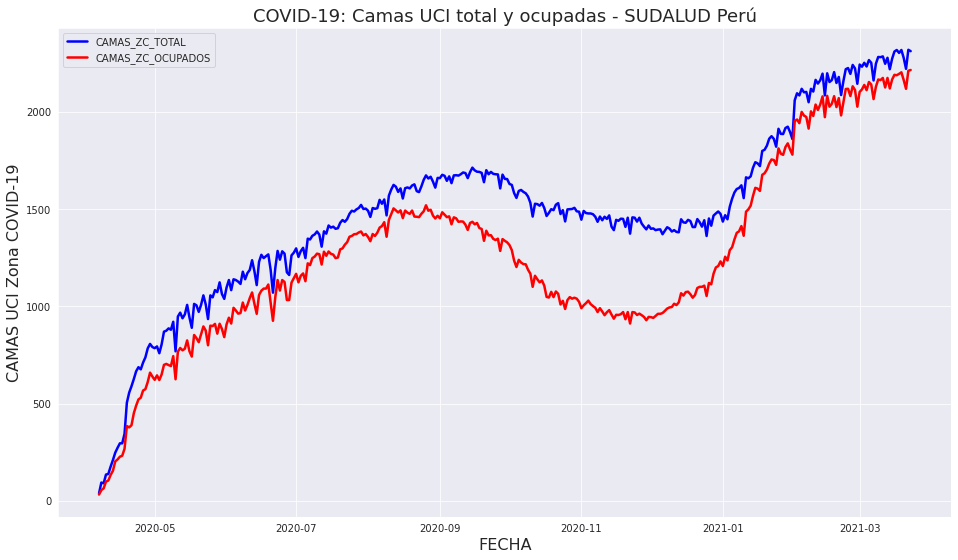

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_all_reg_sin_dup_zc, x=df_all_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='CAMAS_ZC_TOTAL', ax=ax1, linewidth=2.5,color='b')
sns.lineplot(data=df_all_reg_sin_dup_zc, x=df_all_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='CAMAS_ZC_OCUPADOS', ax=ax1,linewidth=2.5,color='r')
ax1.set_ylabel('CAMAS UCI Zona COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.title('COVID-19: Camas UCI total y ocupadas - SUDALUD Perú',fontsize=18)
plt.savefig('CamasUCI_ZC_TotalPeru.pdf')
plt.show()


## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [ ]:
df_all_reg_sin_dup_znc = df_all_regions_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_all_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-19,14889,22023
2021-03-20,14734,21498
2021-03-21,14460,21165
2021-03-22,15188,22008
2021-03-23,15114,21880


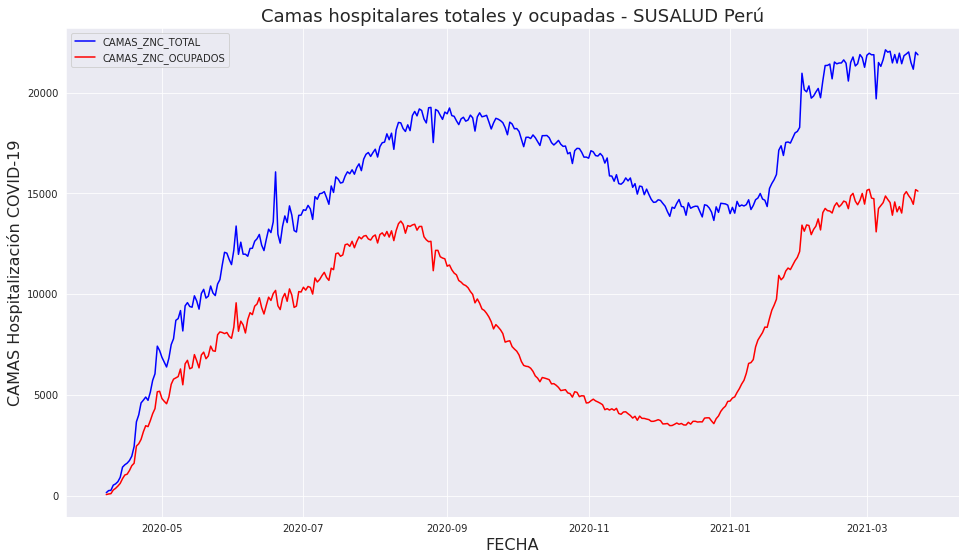

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_all_reg_sin_dup_znc, x=df_all_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='CAMAS_ZNC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_all_reg_sin_dup_znc, x=df_all_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='CAMAS_ZNC_OCUPADOS',  ax=ax1, color='r')
ax1.set_ylabel('CAMAS Hospitalización COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.title('Camas hospitalares totales y ocupadas - SUSALUD Perú',fontsize=18)
plt.savefig('CamasHosp_ZC_TotalPeru.pdf')
plt.show()


## Ventiladores UCI ZC Ocupados

In [ ]:
df_all_reg_sin_dup_vuzc = df_all_regions_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_all_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-03-13,2183,2329
2021-03-14,2129,2270
2021-03-15,2176,2315
2021-03-16,2199,2350
2021-03-17,2198,2361


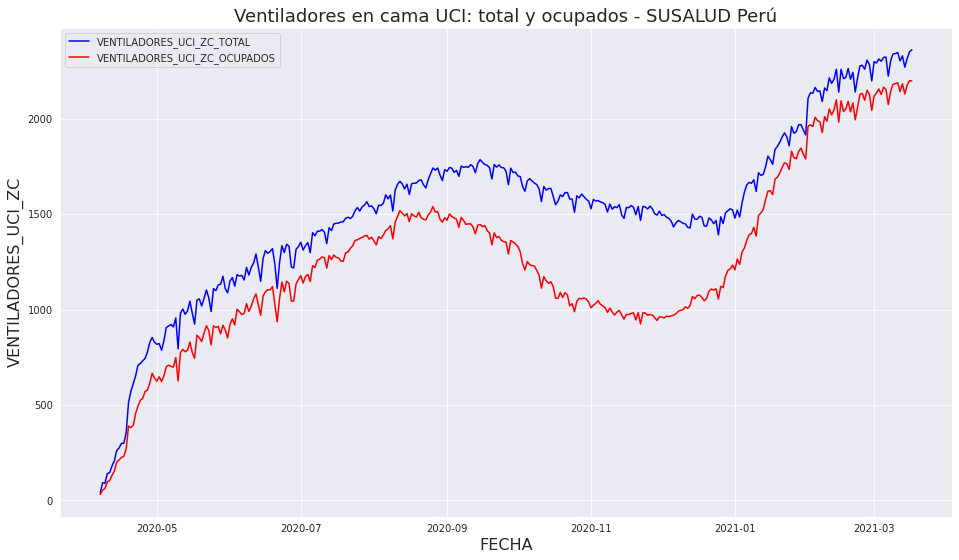

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_all_reg_sin_dup_vuzc, x=df_all_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1,color='b')
sns.lineplot(data=df_all_reg_sin_dup_vuzc, x=df_all_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS', ax=ax1,color='r')
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.title('Ventiladores en cama UCI: total y ocupados - SUSALUD Perú',fontsize=18)
plt.show()

# Lima Region + Lima Metropolitana

In [ ]:
df_lima_region = df[df['REGION'] == 'LIMA'].sort_values('FECHA')
df_lima_region = df_lima_region[df_lima_region['FECHA'] <= fechaCorte]
df_lima_region.reset_index(inplace=True, drop=True)
df_lima_region.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
64618,184713,20210323,20210323,MINSA,150103.0,LIMA,LIMA,II-1,5883,HOSPITAL DE HUAYCAN,Si,0,0,0,18,2,20,0,0,0,0,0,0,0,0,0,25,8,33,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-23,53,10,43
64619,184679,20210323,20210323,Privado,150130.0,LIMA,LIMA,II-E,15179,CLINICA KIRSCHBAUM,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-23,6,6,0
64620,184703,20210323,20210323,Privado,150601.0,LIMA,HUARAL,II-E,17081,CLINICA SAN ANDRES,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,6,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-23,6,5,1
64621,184706,20210323,20210323,Privado,150117.0,LIMA,LIMA,II-E,12106,CLINICA MEDICA PRIMAVERA,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-23,8,0,8
64622,184683,20210323,20210323,Privado,150130.0,LIMA,LIMA,II-E,10467,CLINICA FLEMING,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-23,8,8,0


In [ ]:
df_lima_region_sin_duplicados = df_lima_region.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_lima_region_sin_duplicados = df_lima_region_sin_duplicados.drop_duplicates()

In [ ]:
df_lima_region_sin_duplicados.NOMBRE.unique()

array(['CLINICA MONTEFIORI', 'CLINICA EL GOLF',
       'CLINICA SANTA MARIA DEL SUR', 'CLÍNICA MÉDICA CAYETANO HEREDIA',
       'CLINICA STELLA MARIS', 'CLINICA SAN FELIPE S.A.',
       'CLINICA ANGLOAMERICANA', 'CLINICA PADRE LUIS TEZZA',
       'CLINICA GOOD HOPE', 'CLINICA RICARDO PALMA', 'CLINICA DEL INCA',
       'CLINICA JAVIER PRADO', 'CLINICA SAN JUDAS TADEO',
       'Clínica Internacional - Sede Lima', 'CLÍNICA INTERNACIONAL',
       'GUILLERMO KAELIN DE LA FUENTE', 'CLINICA MONTERRICO',
       'CLINICA MONTESUR', 'CL ESPECIALIDADES MEDICAS', 'ONCOSALUD',
       'AUNA CLÍNICA DELGADO',
       'INSTITUTO DEL CEREBRO Y LA COLUMNA VERTEBRAL',
       'CLINICA LIMATAMBO', 'CLINICA SAN GABRIEL S.A.C.',
       'CLINICA SAN BORJA', 'CLINICA SAN JUAN BAUTISTA',
       'CLINICA SAN PABLO', 'CLINICA MARIA DEL SOCORRO',
       'CLINICA JESUS DEL NORTE', 'INCOR', 'CLINICA SANTA ISABEL',
       'HOSPITAL II CAÑETE', 'CLINICA PETRAS',
       'INO DR. FRANCISCO CONTRERAS C.', 'HOSPITAL DE APO

## Camas ZC (UCI en Zona COVID-19)

In [ ]:
df_lim_reg_sin_dup_zc = df_lima_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_lim_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-19,1134,1140
2021-03-20,1124,1131
2021-03-21,1070,1074
2021-03-22,1131,1138
2021-03-23,1130,1138


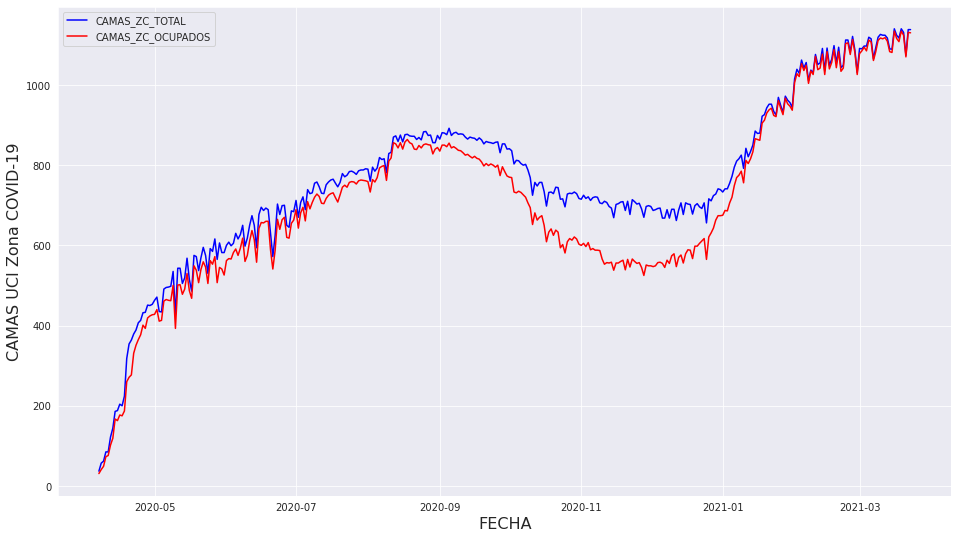

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_zc, x=df_lim_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='CAMAS_ZC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_lim_reg_sin_dup_zc, x=df_lim_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='CAMAS_ZC_OCUPADOS', ax=ax1,color='r')
ax1.set_ylabel('CAMAS UCI Zona COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasUCI_ZC_Lima.pdf')
plt.show()


## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [ ]:
df_lim_reg_sin_dup_znc = df_lima_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_lim_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-19,7898,9294
2021-03-20,8160,9317
2021-03-21,7673,8991
2021-03-22,8094,9267
2021-03-23,7977,9234


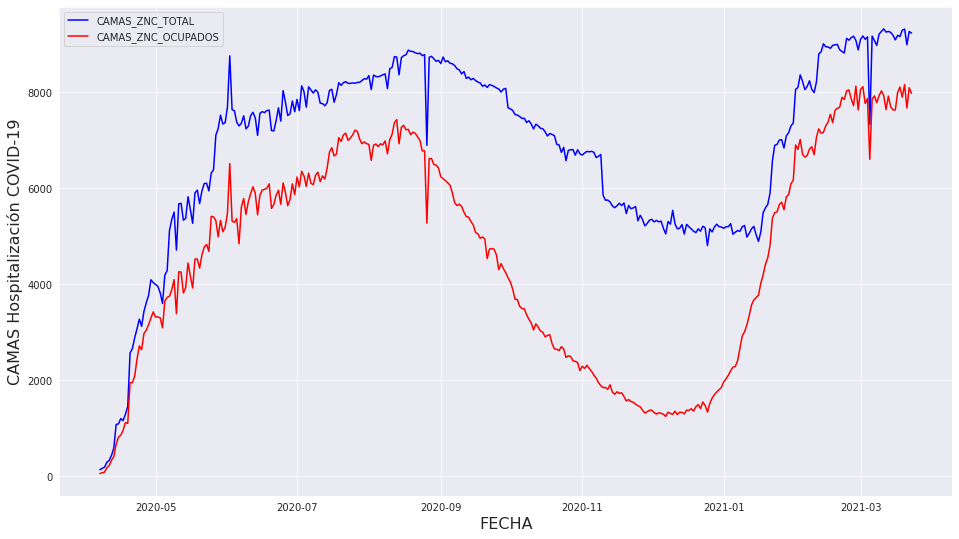

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_znc, x=df_lim_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='CAMAS_ZNC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_lim_reg_sin_dup_znc, x=df_lim_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='CAMAS_ZNC_OCUPADOS',  ax=ax1, color='r')
ax1.set_ylabel('CAMAS Hospitalización COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasHosp_ZC_Lima.pdf')
plt.show()


## Camas UCI Adultos (no COVID-19)

In [ ]:
df_lim_reg_sin_dup_ua = df_lima_region_sin_duplicados.groupby(['FECHA'])['UCI_ADULTOS_CAMAS_OCUPADAS', 'UCI_ADULTOS_CAMAS_TOTAL'].sum()
df_lim_reg_sin_dup_ua.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_TOTAL
FECHA,,
2021-03-15,215,255
2021-03-16,220,261
2021-03-17,223,261
2021-03-18,216,260
2021-03-19,221,263


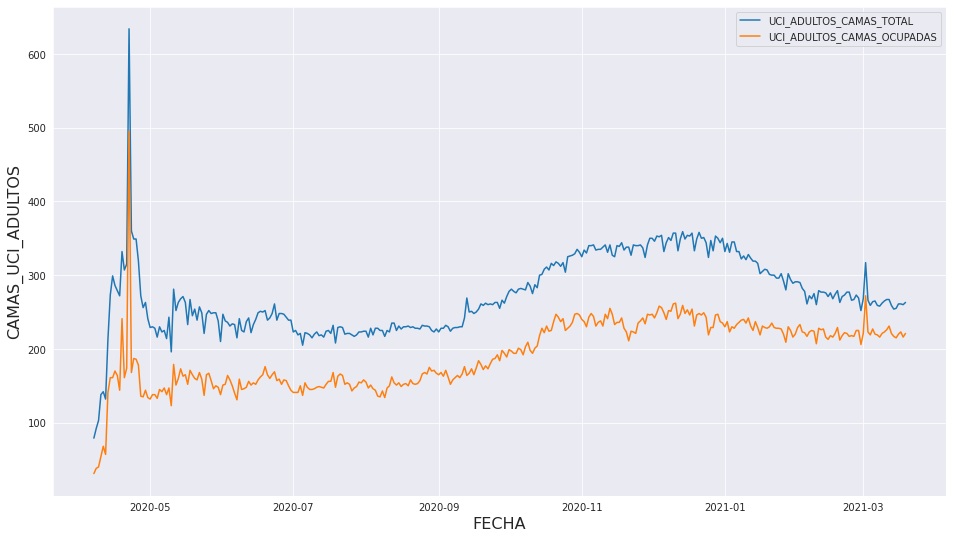

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_ua, x=df_lim_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax1)
sns.lineplot(data=df_lim_reg_sin_dup_ua, x=df_lim_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_UCI_ADULTOS', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Camas Hospitaliarias Ocupadas

In [ ]:
df_lim_reg_sin_dup_cho = df_lima_region_sin_duplicados.groupby(['FECHA'])['CAMAS_HOSP_OCUPADAS', 'CAMAS_HOSP_TOTAL'].sum()
df_lim_reg_sin_dup_cho.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_TOTAL
FECHA,,
2021-03-09,6579,10208
2021-03-10,6668,10170
2021-03-11,6570,10107
2021-03-12,6527,10109
2021-03-13,6563,10044


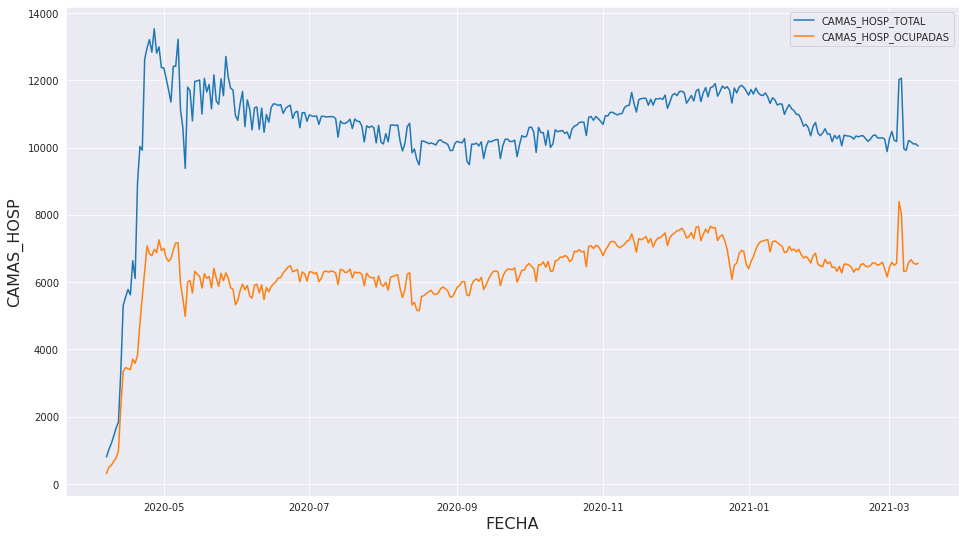

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_cho, x=df_lim_reg_sin_dup_cho.index, y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax1)
sns.lineplot(data=df_lim_reg_sin_dup_cho, x=df_lim_reg_sin_dup_cho.index, y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_HOSP', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Ventiladores UCI ZC Ocupados

In [ ]:
df_lim_reg_sin_dup_vuzc = df_lima_region_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_lim_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-02-28,1032,1047
2021-03-01,1085,1107
2021-03-02,1091,1104
2021-03-03,1101,1116
2021-03-04,1091,1113


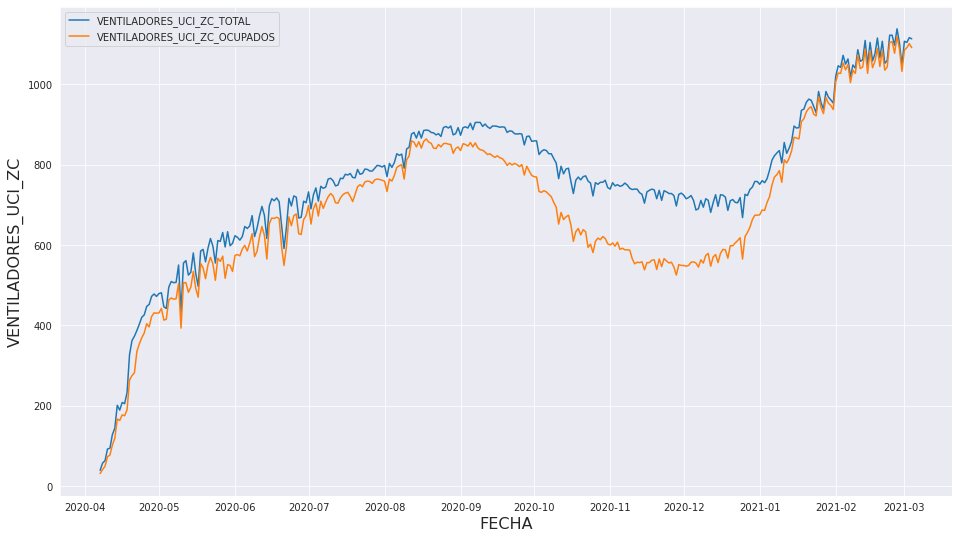

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_vuzc, x=df_lim_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1)
sns.lineplot(data=df_lim_reg_sin_dup_vuzc, x=df_lim_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS',  ax=ax1)
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

# Tacna, Region

In [ ]:
df_tacna_region = df[df['REGION'] == 'TACNA'].sort_values('FECHA')
df_tacna_region = df_tacna_region[df_tacna_region['FECHA'] <= fechaCorte]
df_tacna_region.reset_index(inplace=True, drop=True)
df_tacna_region.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
1610,182009,20210319,20210319,EsSalud,230103.0,TACNA,TACNA,II-2,10185,HOSPITAL III DANIEL ALCIDES CARRIÓN,Si,23,2,25,65,146,211,5,0,5,0,0,0,0,6,6,53,53,106,23,2,25,3,2,5,0,0,0,0,0,0,2021-03-19,353,207,146
1611,182326,20210319,20210319,Gob Regional,230101.0,TACNA,TACNA,II-2,2864,HOSPITAL HIPOLITO UNANUE DE TACNA,Si,13,2,15,60,114,174,2,1,3,2,1,3,0,0,0,0,195,195,13,2,15,2,1,3,2,1,3,0,0,0,2021-03-19,390,313,77
1612,182035,20210319,20210319,Privado,230101.0,TACNA,TACNA,II-1,27462,CLINICA LA LUZ,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,20,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-19,20,10,10
1613,182451,20210319,20210319,Privado,230302.0,TACNA,JORGE BASADRE,II-1,18230,HOSPITAL TOQUEPALA,Si,0,0,0,4,5,9,0,0,0,0,0,0,0,0,0,5,9,14,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-19,23,14,9
1614,183041,20210320,20210319,Privado,230302.0,TACNA,JORGE BASADRE,II-1,18230,HOSPITAL TOQUEPALA,Si,0,0,0,4,5,9,0,0,0,0,0,0,0,0,0,5,9,14,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-19,23,14,9


In [ ]:
df_tacna_region_sin_duplicados = df_tacna_region.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_tacna_region_sin_duplicados = df_tacna_region_sin_duplicados.drop_duplicates()

In [ ]:
df_tacna_region_sin_duplicados.NOMBRE.unique()

array(['CLINICA LA LUZ', 'HOSPITAL III DANIEL ALCIDES CARRIÓN',
       'HOSPITAL HIPOLITO UNANUE DE TACNA', 'CLINICA ISABEL',
       'HOSPITAL TOQUEPALA'], dtype=object)

## Dividido por Instituciones

In [ ]:
def subplot(institucion):
    df_institucion = df_tacna_region_sin_duplicados[df_tacna_region_sin_duplicados['NOMBRE'] == institucion]

    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_TOTAL",  label='Camas UCI Total', ax=ax1,color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas', ax=ax1,color='r')
    ax1.set_ylabel('Camas UCI COVID-19', fontsize=14)
    ax1.set_xlabel('Fecha', fontsize=16)

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_TOTAL",  label='Camas Hosp Total', ax=ax2, color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_OCUPADOS", label='Camas Hosp Total',  ax=ax2, color='r')
    ax2.set_ylabel('Camas Hospitalarias COVID-19', fontsize=14)
    ax2.set_xlabel('Fecha', fontsize=16)

    plt.suptitle(institucion, fontsize=20)
    plt.show()

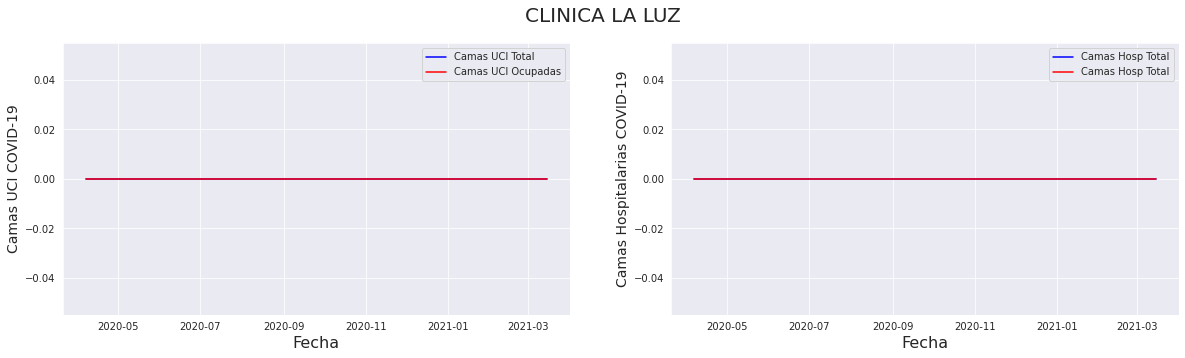

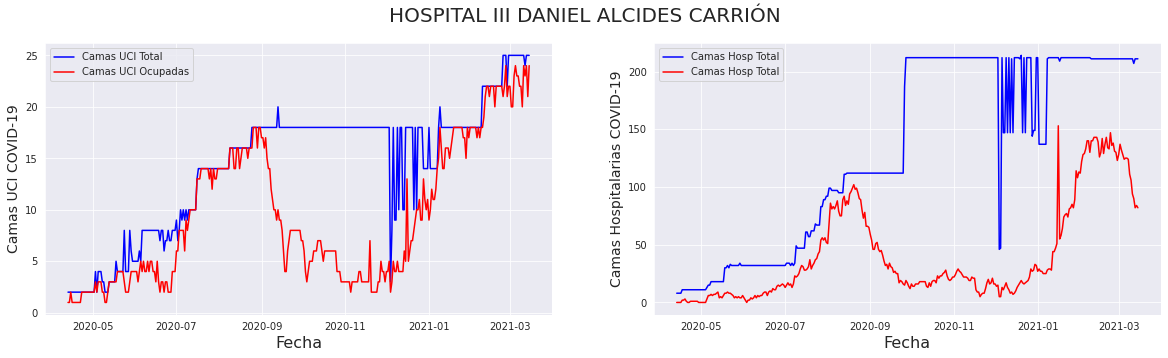

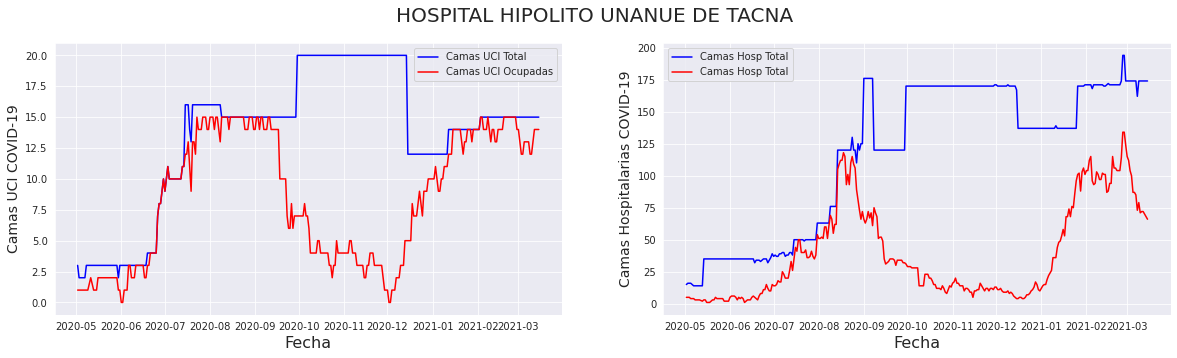

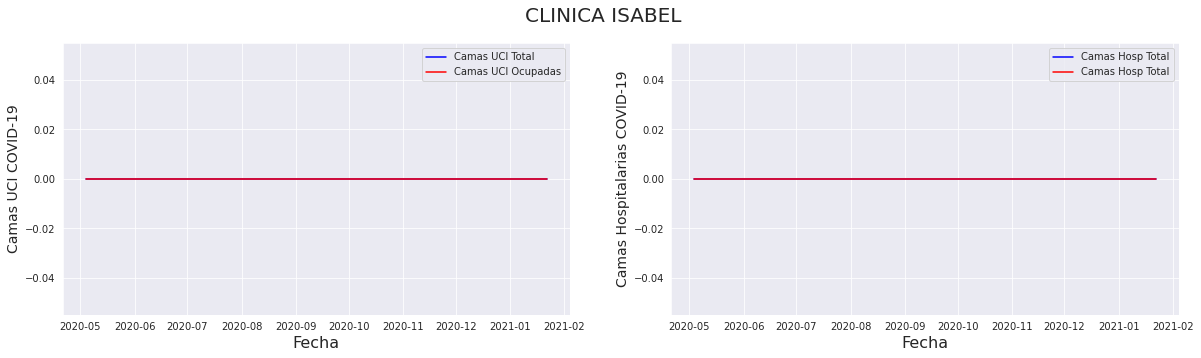

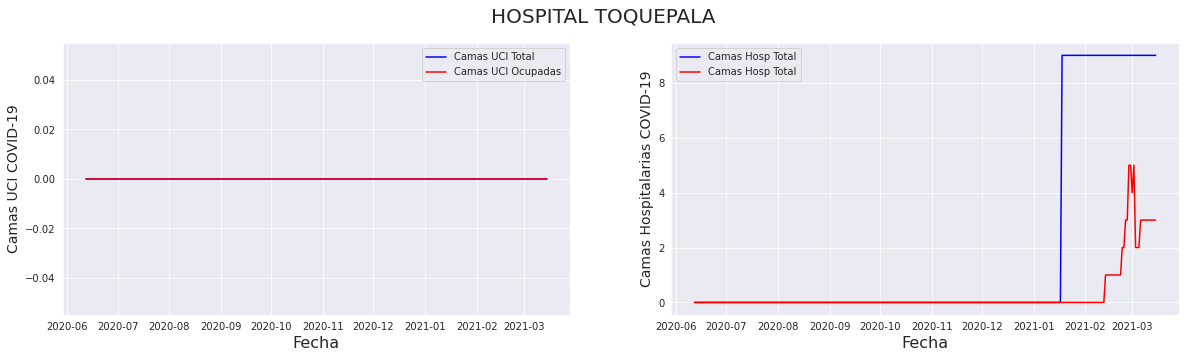

In [ ]:
for institucion in df_tacna_region_sin_duplicados.NOMBRE.unique():
    subplot(institucion)

## Camas ZC (UCI en Zona COVID-19)

In [ ]:
df_tcq_reg_sin_dup_zc = df_tacna_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_tcq_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-15,38,40
2021-03-16,35,40
2021-03-17,37,40
2021-03-18,37,40
2021-03-19,36,40


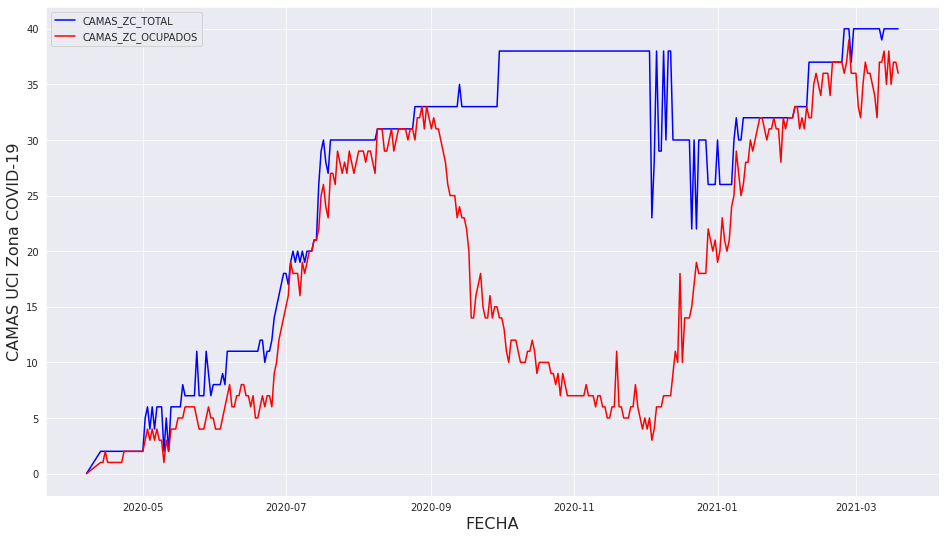

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_zc, x=df_tcq_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='CAMAS_ZC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_tcq_reg_sin_dup_zc, x=df_tcq_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='CAMAS_ZC_OCUPADOS', ax=ax1,color='r')
ax1.set_ylabel('CAMAS UCI Zona COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasUCI_ZC_Tacna.pdf')
plt.show()


## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [ ]:
df_tcq_reg_sin_dup_znc = df_tacna_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_tcq_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-15,151,394
2021-03-16,143,394
2021-03-17,127,394
2021-03-18,125,394
2021-03-19,129,394


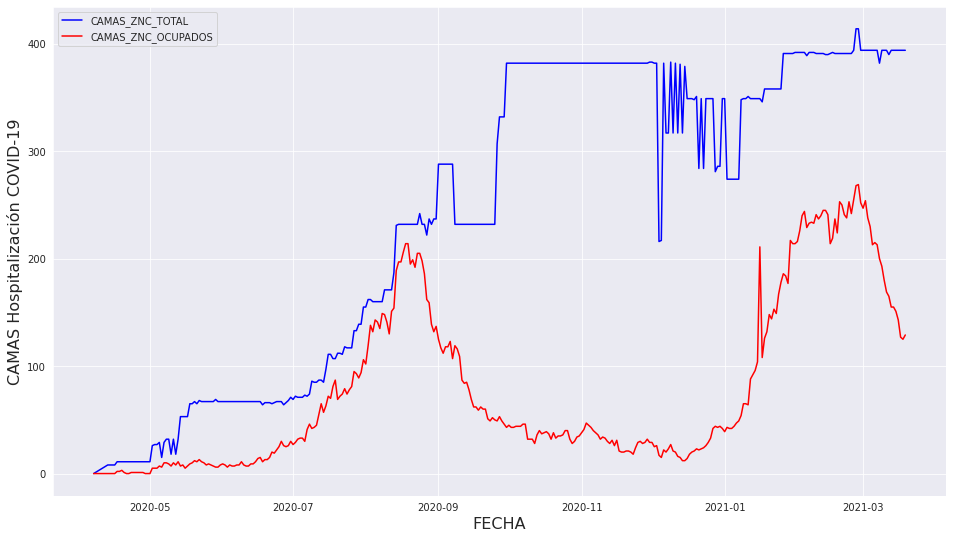

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.lineplot(data=df_tcq_reg_sin_dup_znc, x=df_tcq_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='CAMAS_ZNC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_tcq_reg_sin_dup_znc, x=df_tcq_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='CAMAS_ZNC_OCUPADOS',  ax=ax1, color='r')
ax1.set_ylabel('CAMAS Hospitalización COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasHosp_ZC_Tacna.pdf')
plt.show()


## Camas UCI Adultos (no COVID-19)

In [ ]:
df_tcq_reg_sin_dup_ua = df_tacna_region_sin_duplicados.groupby(['FECHA'])['UCI_ADULTOS_CAMAS_OCUPADAS', 'UCI_ADULTOS_CAMAS_TOTAL'].sum()
df_tcq_reg_sin_dup_ua.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_TOTAL
FECHA,,
2021-02-28,6,8
2021-03-01,6,8
2021-03-02,6,8
2021-03-03,6,8
2021-03-04,6,8


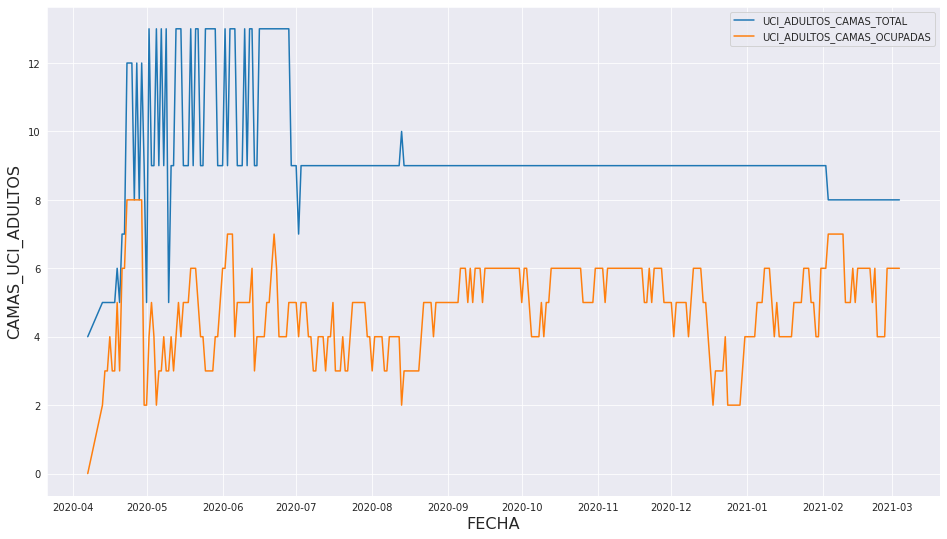

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_ua, x=df_tcq_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax1)
sns.lineplot(data=df_tcq_reg_sin_dup_ua, x=df_tcq_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_UCI_ADULTOS', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Camas Hospitaliarias Ocupadas

In [ ]:
df_tcq_reg_sin_dup_cho = df_tacna_region_sin_duplicados.groupby(['FECHA'])['CAMAS_HOSP_OCUPADAS', 'CAMAS_HOSP_TOTAL'].sum()
df_tcq_reg_sin_dup_cho.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_TOTAL
FECHA,,
2021-02-28,54,323
2021-03-01,59,323
2021-03-02,56,323
2021-03-03,51,323
2021-03-04,57,323


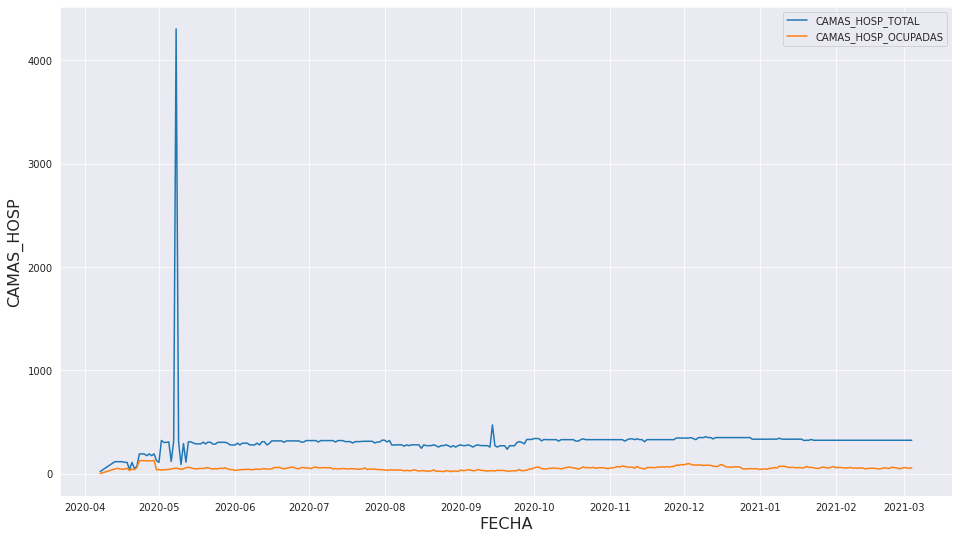

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_cho, x=df_tcq_reg_sin_dup_cho.index, y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax1)
sns.lineplot(data=df_tcq_reg_sin_dup_cho, x=df_tcq_reg_sin_dup_cho.index, y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_HOSP', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Ventiladores UCI ZC Ocupados

In [ ]:
df_tcq_reg_sin_dup_vuzc = df_tacna_region_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_tcq_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-02-28,36,40
2021-03-01,36,40
2021-03-02,33,40
2021-03-03,32,40
2021-03-04,35,40


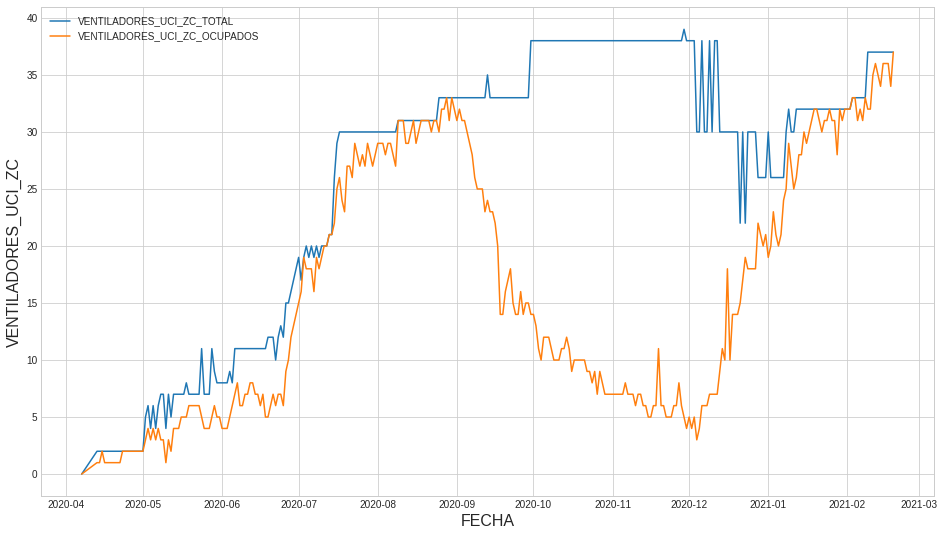

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_vuzc, x=df_tcq_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1)
sns.lineplot(data=df_tcq_reg_sin_dup_vuzc, x=df_tcq_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS',  ax=ax1)
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

# Arequipa, Region

In [ ]:
df_arequipa_region = df[df['REGION'] == 'AREQUIPA'].sort_values('FECHA')
df_arequipa_region = df_arequipa_region[df_arequipa_region['FECHA'] <= fechaCorte]
df_arequipa_region.reset_index(inplace=True, drop=True)
df_arequipa_region.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
9214,185335,20210324,20210324,Gob Regional,40201.0,AREQUIPA,CAMANA,II-1,1344,HOSPITAL DE CAMANA,Si,0,0,0,20,51,71,0,0,0,0,0,0,0,0,0,21,46,67,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,138,97,41
9215,185337,20210324,20210324,Privado,40101.0,AREQUIPA,AREQUIPA,II-E,24208,PRAXIS MEDICAL S.A.C.,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,12,12,0
9216,185361,20210324,20210324,FFAA y PNP,40109.0,AREQUIPA,AREQUIPA,II-1,18659,HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA,Si,0,0,0,0,10,10,0,0,0,0,0,0,0,0,0,12,27,39,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,49,37,12
9217,185100,20210324,20210324,FFAA y PNP,40104.0,AREQUIPA,AREQUIPA,II-E,11448,HOSPITAL REGIONAL DEL SUR,Si,0,0,0,0,8,8,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,11,11,0
9218,186006,20210325,20210324,Privado,40126.0,AREQUIPA,AREQUIPA,II-E,12692,OFTALMOLOGIA AVANZADA,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-24,0,0,0


In [ ]:
df_arequipa_region_sin_duplicados = df_arequipa_region.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_arequipa_region_sin_duplicados = df_arequipa_region_sin_duplicados.drop_duplicates()

In [ ]:
df_arequipa_region_sin_duplicados.NOMBRE.unique()

array(['CLINICA SAN JUAN DE DIOS', 'CLINICA VALLESUR',
       'CLINICA AREQUIPA S.A.',
       'SISTEMAS DE ADMINISTRACION HOSPITALARIA S.A.C. (SANNA - CLINICA DEL SUR)',
       'CLINICA SAN PABLO AREQUIPA',
       'CLINICA J. PRADO SANTA MARIA E.I.R.L.', 'CLINICA ALMONTE SAC',
       'HOSPITAL GOYENECHE', 'HOSPITAL III YANAHUARA',
       'HOSPITAL REGIONAL DEL SUR',
       'HOSPITAL II MANUEL DE TORRES MUÑOZ -  MOLLENDO',
       'HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ESCOBEDO',
       'HOSPITAL I EDMUNDO ESCOMEL',
       'HOSPITAL I SAMUEL PASTOR DE CAMANA ESSALUD', 'HOSPITAL APLAO',
       'INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS',
       'HOSPITAL REGIONAL PNP AREQUIPA', 'POSTA MEDICA CHALA',
       'MELO CLINICA DE REPRODUCCION Y GENETICA',
       'HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS',
       'CLINICA ALIVIARI', 'HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA',
       'PRAXIS MEDICAL S.A.C.', 'HOSPITAL DE CAMANA', 'CEFERGIN',
       'HOSPITAL MILIT

## Camas ZC (UCI en Zona COVID-19)

In [ ]:
df_are_reg_sin_dup_zc = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_are_reg_sin_dup_zc.to_csv('CamasUCI_ZC_Arequipa.csv')
df_are_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-20,93,101
2021-03-21,98,101
2021-03-22,90,99
2021-03-23,88,96
2021-03-24,93,97


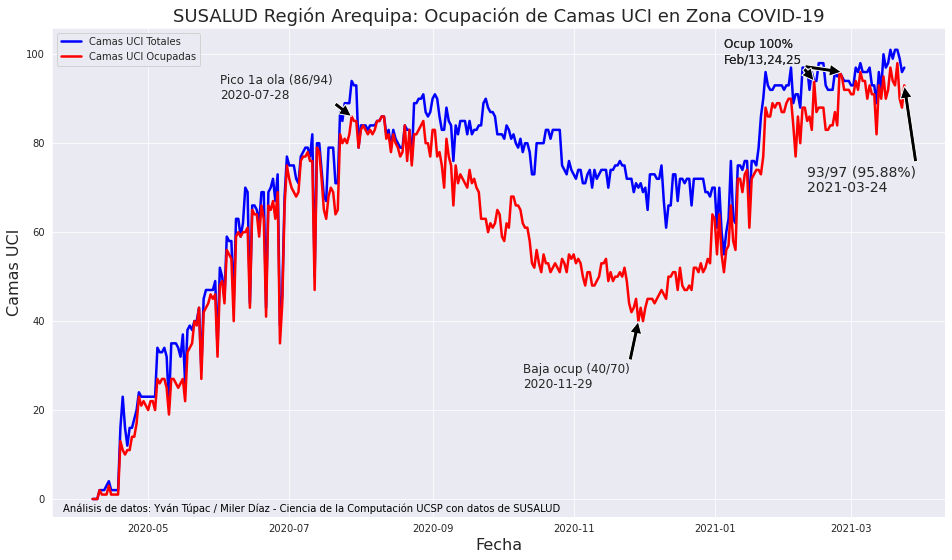

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

# Add labels to the plot

sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='Camas UCI Totales', ax=ax1,color='b',linewidth=2.5)
sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas',  ax=ax1,color='r',linewidth=2.5)
ax1.set_ylabel('Camas UCI', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-4,106)

# Add anottations to the plot
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2020-03-25'), -3, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de SUSALUD", **style)
ax1.annotate("Pico 1a ola (86/94)\n2020-07-28", xy=(pd.to_datetime('2020-7-28'), 86),  xycoords='data',
            xytext=(pd.to_datetime('2020-6-1'), 90), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Baja ocup (40/70)\n2020-11-29", xy=(pd.to_datetime('2020-11-29'), 40),  xycoords='data',
            xytext=(pd.to_datetime('2020-10-10'), 25), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Ocup 100%\nFeb/13,24,25", xy=(pd.to_datetime('2021-02-25'), 96),  xycoords='data',
            xytext=(pd.to_datetime('2021-1-5'), 98), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Ocup 100%\nFeb/13,24,25", xy=(pd.to_datetime('2021-02-13'), 94),  xycoords='data',
            xytext=(pd.to_datetime('2021-1-5'), 98), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
lastOccupied  = str(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS))
lastTotal     = str(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL))
lastPercent   = str(round(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS)/int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL)*100,2))
lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"
ax1.annotate(lastAnnotate + "\n" + fechaCorte, xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS),  xycoords='data',
            xytext=(pd.to_datetime('2021-02-10'), 69), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)

plt.title('SUSALUD Región Arequipa: Ocupación de Camas UCI en Zona COVID-19',fontsize=18)
plt.savefig('CamasUCI_ZC_Arequipa.pdf')
plt.show()

## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [ ]:
df_are_reg_sin_dup_znc = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_are_reg_sin_dup_znc.to_csv('CamasHosp_ZC_Arequipa.csv')
df_are_reg_sin_dup_znc.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-20,524,1151
2021-03-21,482,1134
2021-03-22,517,1149
2021-03-23,519,1133
2021-03-24,509,1053


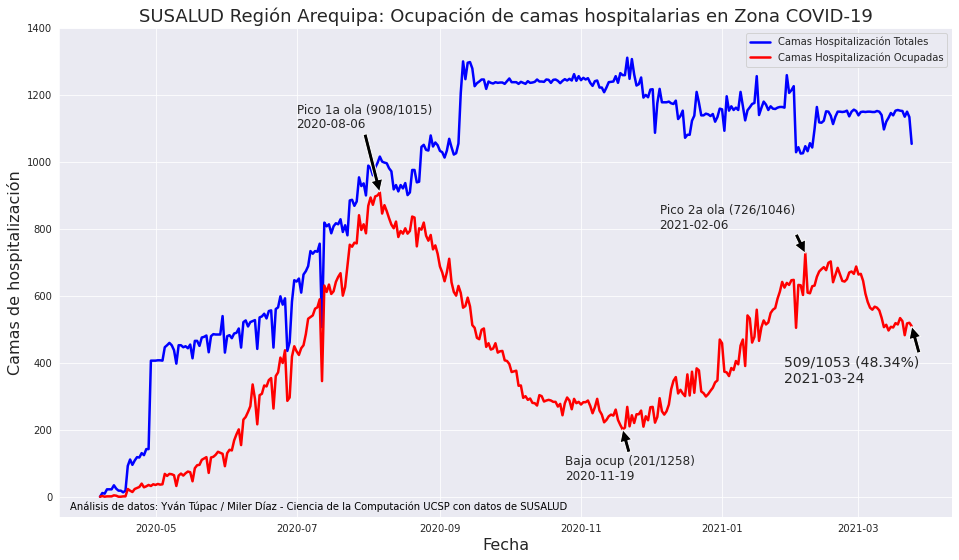

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_znc, x=df_are_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='Camas Hospitalización Totales', ax=ax1,color='b',linewidth=2.5)
sns.lineplot(data=df_are_reg_sin_dup_znc, x=df_are_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='Camas Hospitalización Ocupadas',  ax=ax1, color='r',linewidth=2.5)
ax1.set_ylabel('Camas de hospitalización', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-60,1400)
style = dict(size=10, color='k')
ax1.annotate("Pico 1a ola (908/1015)\n2020-08-06", xy=(pd.to_datetime('2020-08-06'), 908),  xycoords='data',
            xytext=(pd.to_datetime('2020-07-01'), 1100), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Baja ocup (201/1258)\n2020-11-19", xy=(pd.to_datetime('2020-11-19'), 201),  xycoords='data',
            xytext=(pd.to_datetime('2020-10-25'), 50), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Pico 2a ola (726/1046)\n2021-02-06", xy=(pd.to_datetime('2021-02-06'), 726),  xycoords='data',
            xytext=(pd.to_datetime('2020-12-05'), 800), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
#ax1.annotate("533/1152 (46.27%)\n2021/Mar/19", xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS),  xycoords='data',
#            xytext=(pd.to_datetime('2021-01-25'), 340), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)

lastOccupied  = str(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS))
lastTotal     = str(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL))
lastPercent   = str(round(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS)/int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL)*100,2))
lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"

ax1.annotate(lastAnnotate + "\n" + fechaCorte, xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS),  xycoords='data',
            xytext=(pd.to_datetime('2021-01-28'), 340), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)
ax1.text(pd.to_datetime('2020-03-25'), -40, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de SUSALUD", **style)

plt.title('SUSALUD Región Arequipa: Ocupación de camas hospitalarias en Zona COVID-19',fontsize=18)
plt.savefig('CamasHosp_ZC_Arequipa.pdf')
plt.show()


## Camas UCI Adultos

In [ ]:
df_are_reg_sin_dup_ua = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['UCI_ADULTOS_CAMAS_OCUPADAS', 'UCI_ADULTOS_CAMAS_TOTAL'].sum()
df_are_reg_sin_dup_ua.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_TOTAL
FECHA,,
2021-03-17,17,23
2021-03-18,17,23
2021-03-19,15,22
2021-03-20,14,22
2021-03-21,14,22


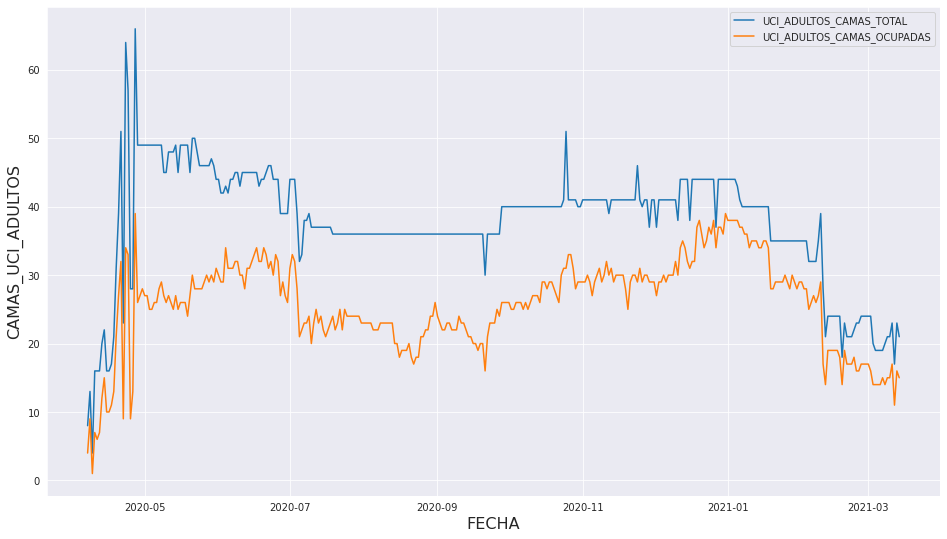

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_ua, x=df_are_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax1)
sns.lineplot(data=df_are_reg_sin_dup_ua, x=df_are_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_UCI_ADULTOS', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Camas Hospitaliarias Ocupadas

In [ ]:
df_are_reg_sin_dup_cho = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['CAMAS_HOSP_OCUPADAS', 'CAMAS_HOSP_TOTAL'].sum()
df_are_reg_sin_dup_cho.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_TOTAL
FECHA,,
2021-03-11,652,1047
2021-03-12,428,726
2021-03-13,640,1035
2021-03-14,615,991
2021-03-15,655,1067


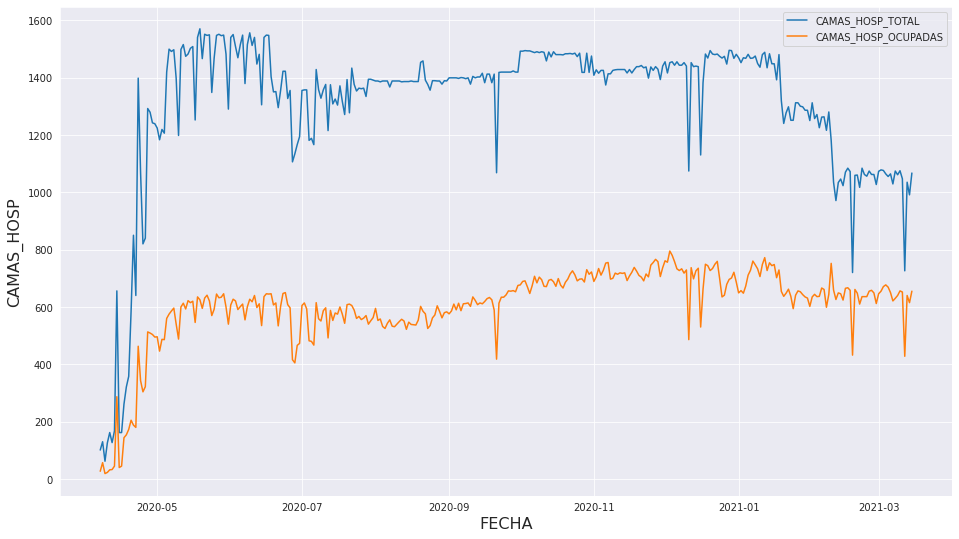

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_cho, x=df_are_reg_sin_dup_cho.index, y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax1)
sns.lineplot(data=df_are_reg_sin_dup_cho, x=df_are_reg_sin_dup_cho.index, y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_HOSP', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Ventiladores UCI ZC Ocupados

In [ ]:
df_are_reg_sin_dup_vuzc = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_are_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-03-11,91,93
2021-03-12,82,89
2021-03-13,93,96
2021-03-14,90,92
2021-03-15,95,100


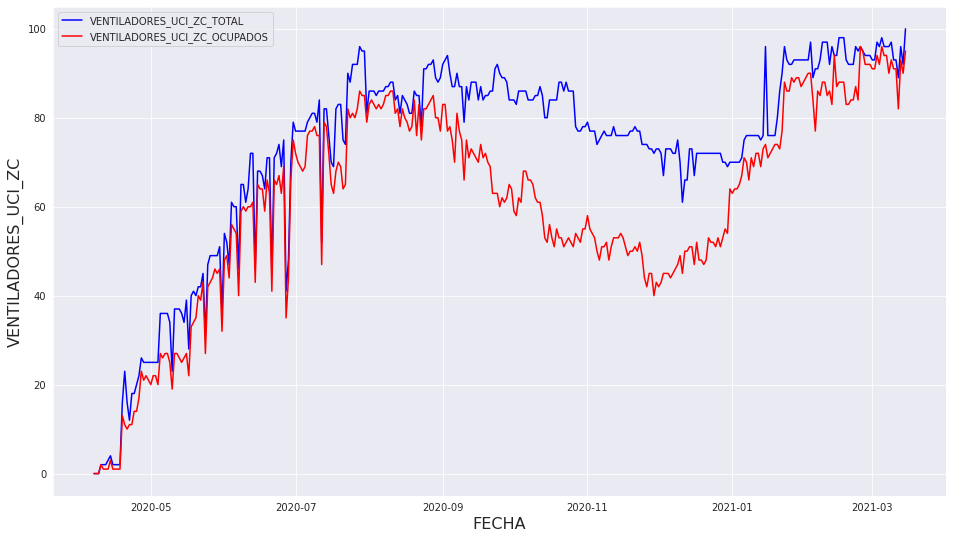

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_vuzc, x=df_are_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1,color='b')
sns.lineplot(data=df_are_reg_sin_dup_vuzc, x=df_are_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS',  ax=ax1,color='r')
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

# Arequipa, Provincia

In [ ]:
df_arequipa_provincia = df[df['PROVINCIA'] == 'AREQUIPA'].sort_values('FECHA')
df_arequipa_provincia.reset_index(inplace=True, drop=True)

In [ ]:
df_arequipa_provincia_sin_duplicados = df_arequipa_provincia.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_arequipa_provincia_sin_duplicados = df_arequipa_provincia_sin_duplicados.drop_duplicates()

In [ ]:
df_arequipa_provincia_sin_duplicados.NOMBRE.unique()

array(['CLINICA SAN JUAN DE DIOS', 'CLINICA VALLESUR',
       'CLINICA AREQUIPA S.A.',
       'SISTEMAS DE ADMINISTRACION HOSPITALARIA S.A.C. (SANNA - CLINICA DEL SUR)',
       'CLINICA SAN PABLO AREQUIPA',
       'CLINICA J. PRADO SANTA MARIA E.I.R.L.', 'CLINICA ALMONTE SAC',
       'HOSPITAL GOYENECHE', 'HOSPITAL III YANAHUARA',
       'HOSPITAL REGIONAL DEL SUR',
       'HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ESCOBEDO',
       'HOSPITAL I EDMUNDO ESCOMEL',
       'INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS',
       'HOSPITAL REGIONAL PNP AREQUIPA',
       'MELO CLINICA DE REPRODUCCION Y GENETICA', 'CLINICA ALIVIARI',
       'HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA',
       'PRAXIS MEDICAL S.A.C.', 'CEFERGIN',
       'HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA',
       'CLINICA PAZ HOLANDESA', 'OFTALMOLOGIA AVANZADA'], dtype=object)

## Dividido por Instituciones

In [ ]:
def subplot(institucion):
    df_institucion = df_arequipa_provincia_sin_duplicados[df_arequipa_provincia_sin_duplicados['NOMBRE'] == institucion]

    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_TOTAL",  label='Camas UCI Totales', ax=ax1,color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas', ax=ax1,color='r')
    ax1.set_ylabel('Camas UCI COVID-19', fontsize=14)
    ax1.set_xlabel('Fecha', fontsize=16)

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_TOTAL",  label='Camas Hosp Totales', ax=ax2, color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_OCUPADOS", label='Camas Hosp Ocupadas',  ax=ax2, color='r')
    ax2.set_ylabel('Camas Hospitalarias COVID-19', fontsize=14)
    ax2.set_xlabel('Fecha', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax3)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax3)
    #ax3.set_ylabel('UCI_ADULTOS_CAMAS', fontsize=16)
    #ax3.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_PEDIATRIA_CAMAS_TOTAL",  label='UCI_PEDIATRIA_CAMAS_TOTAL', ax=ax4)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_PEDIATRIA_CAMAS_OCUPADAS", label='UCI_PEDIATRIA_CAMAS_OCUPADAS',  ax=ax4)
    #ax4.set_ylabel('UCI_PEDIATRIA_CAMAS', fontsize=16)
    #ax4.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCIN_CAMAS_TOTAL",  label='UCIN_CAMAS_TOTAL', ax=ax5)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCIN_CAMAS_OCUPADAS", label='UCIN_CAMAS_OCUPADAS',  ax=ax5)
    #ax5.set_ylabel('UCIN_CAMAS', fontsize=16)
    #ax5.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax6)
    #sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax6)
    #ax6.set_ylabel('CAMAS_HOSP', fontsize=16)
    #ax6.set_xlabel('FECHA', fontsize=16)

    plt.suptitle(institucion, fontsize=20)
    plt.show()

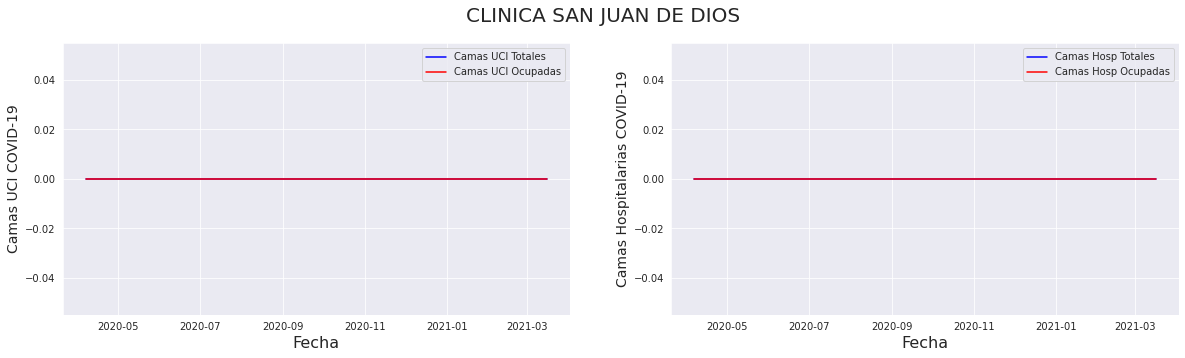

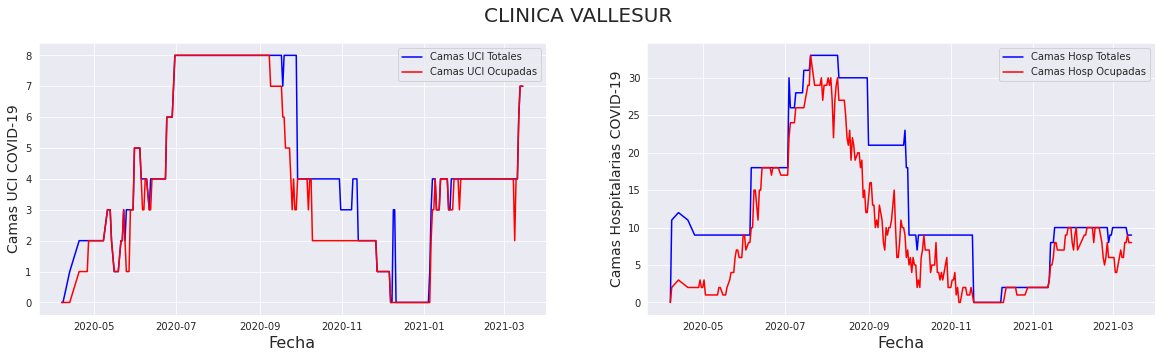

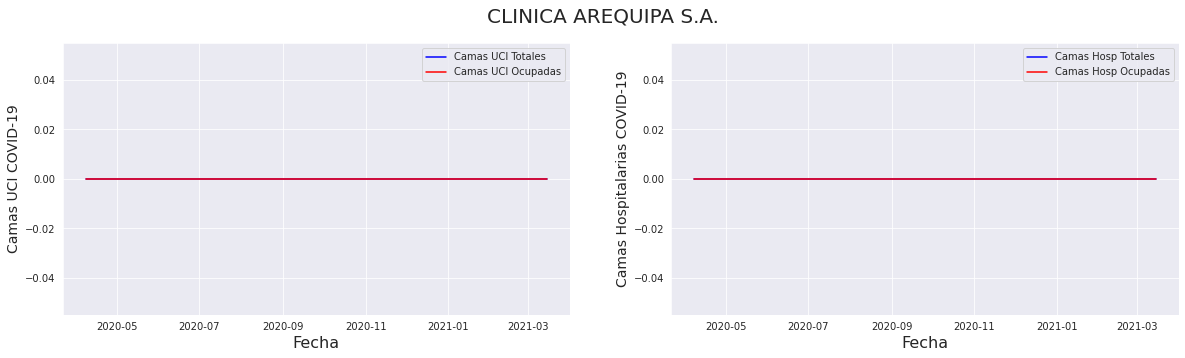

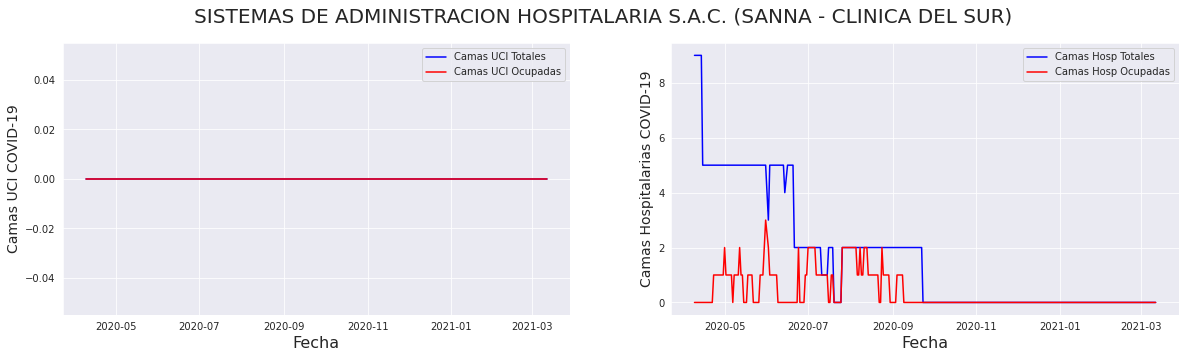

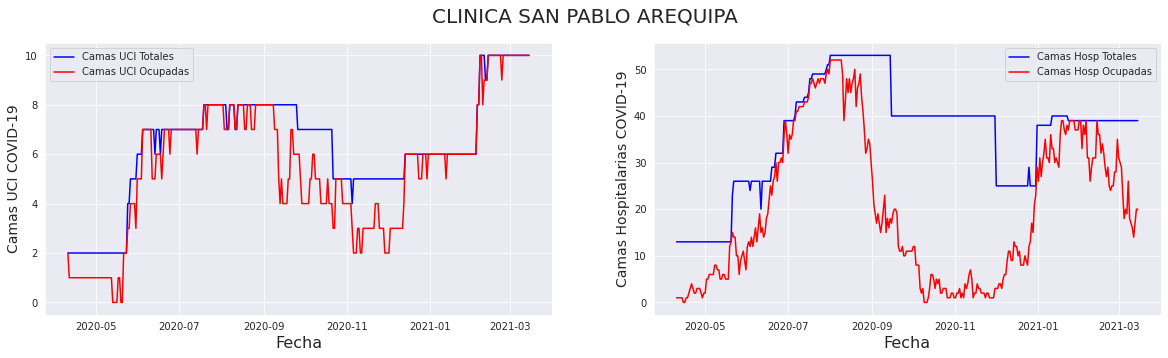

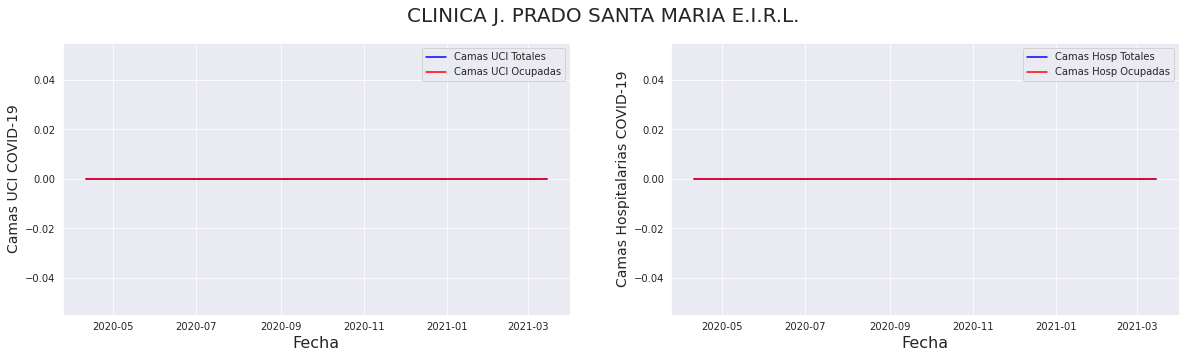

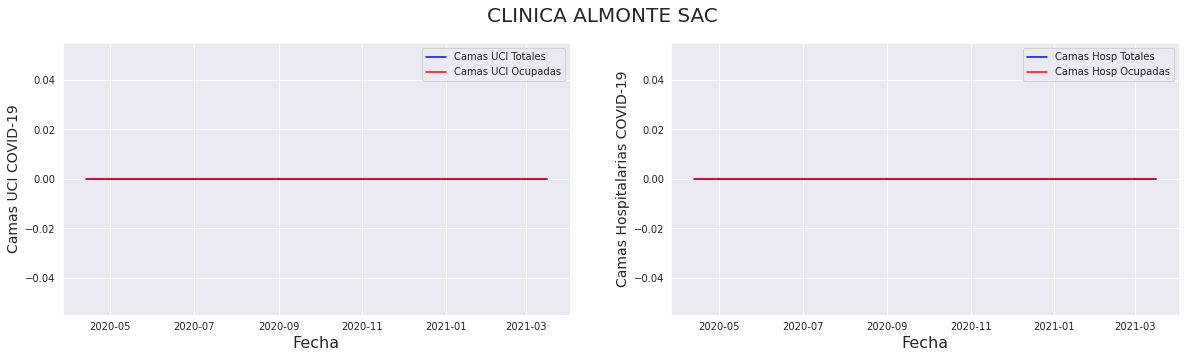

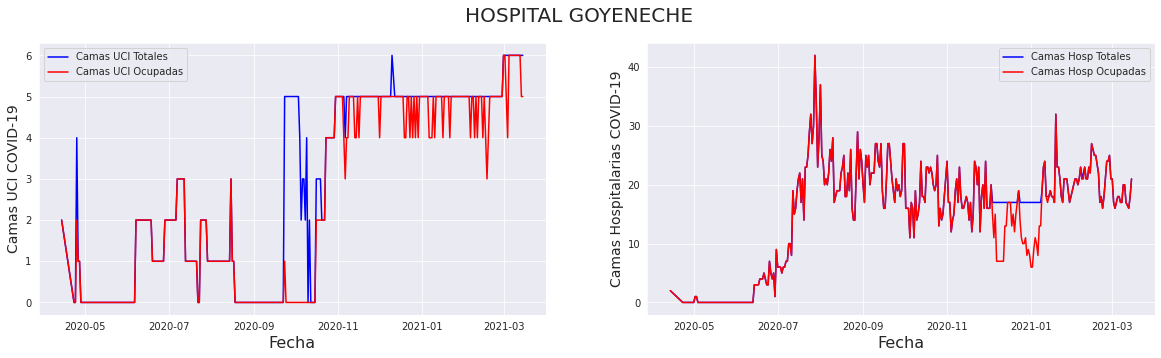

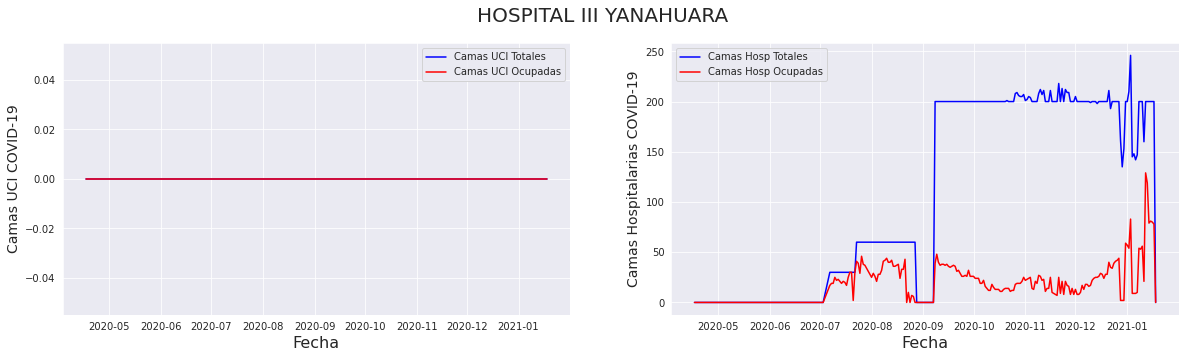

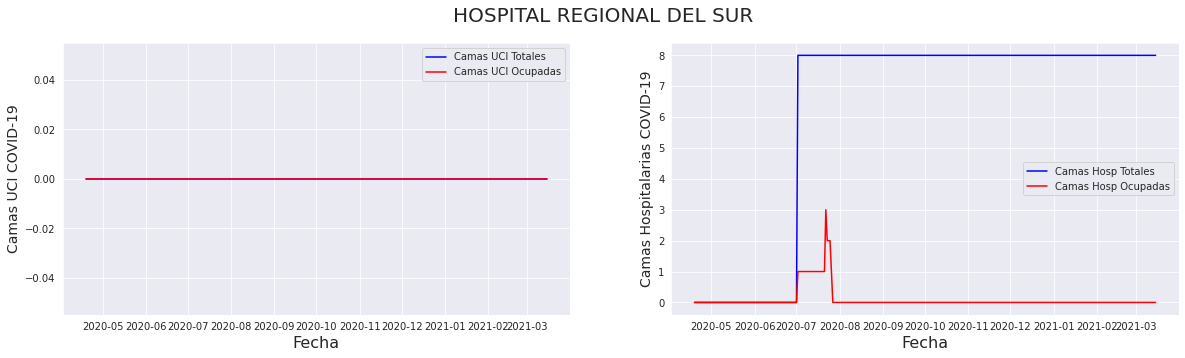

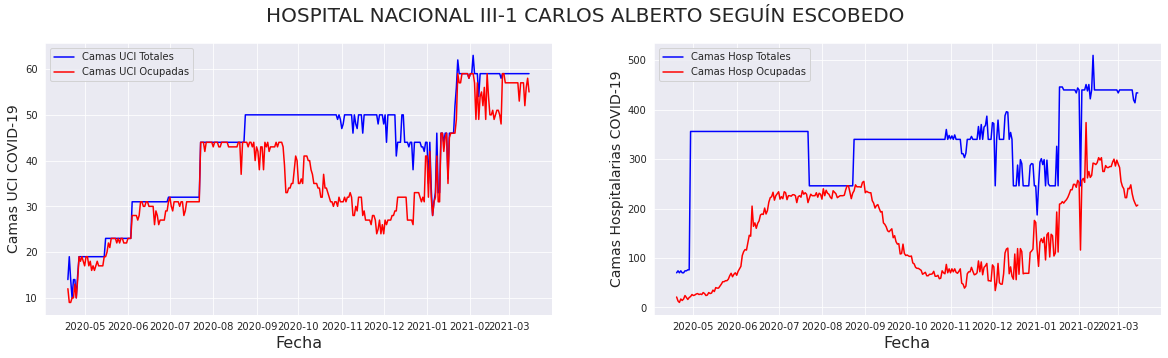

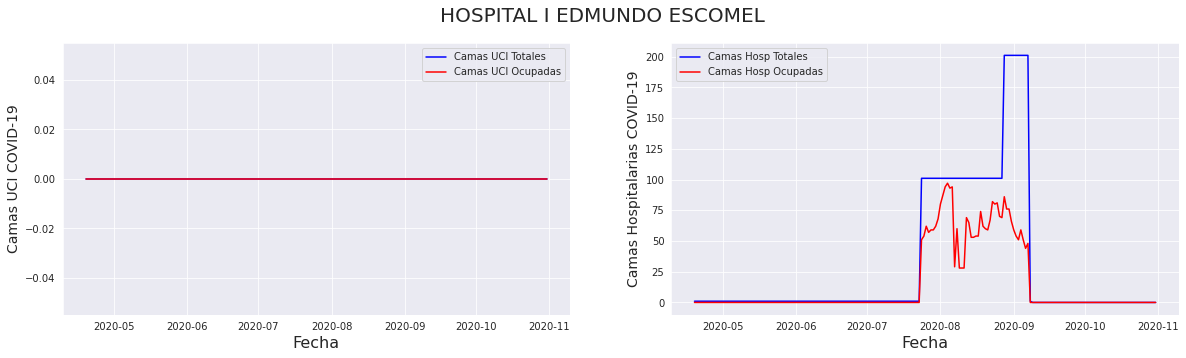

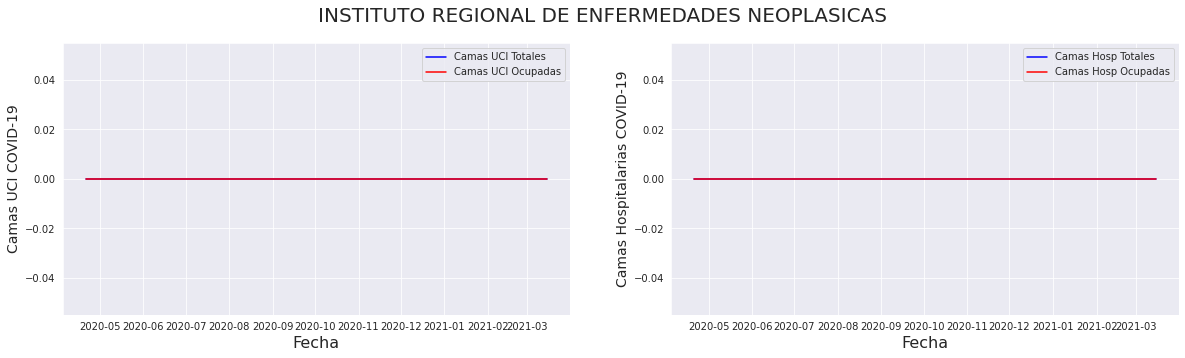

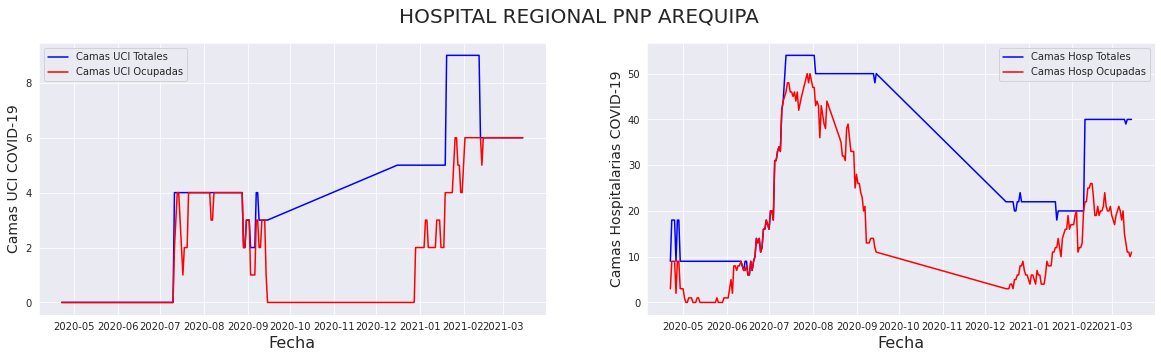

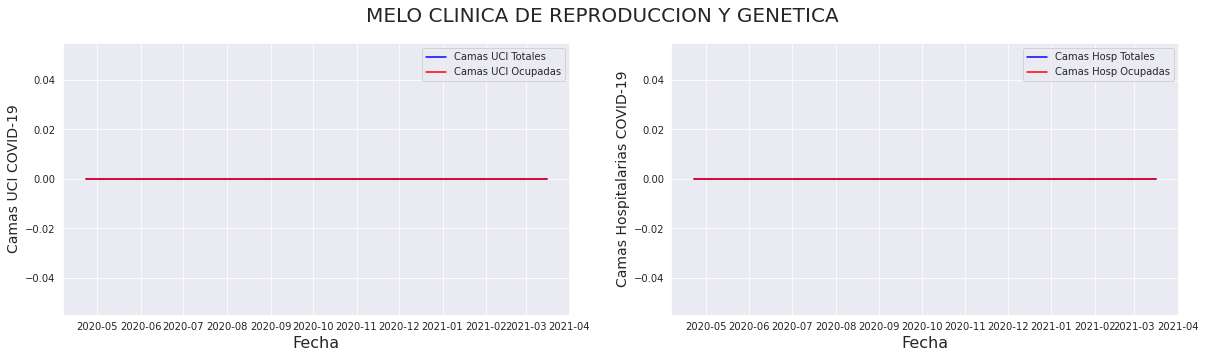

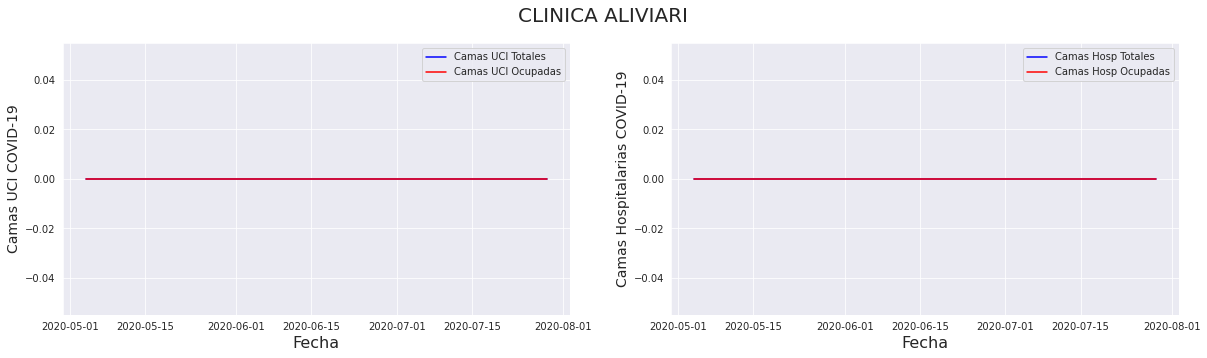

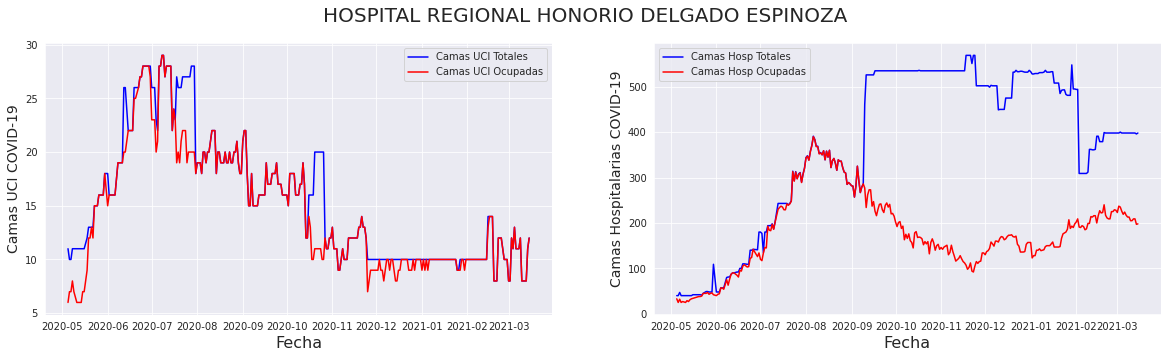

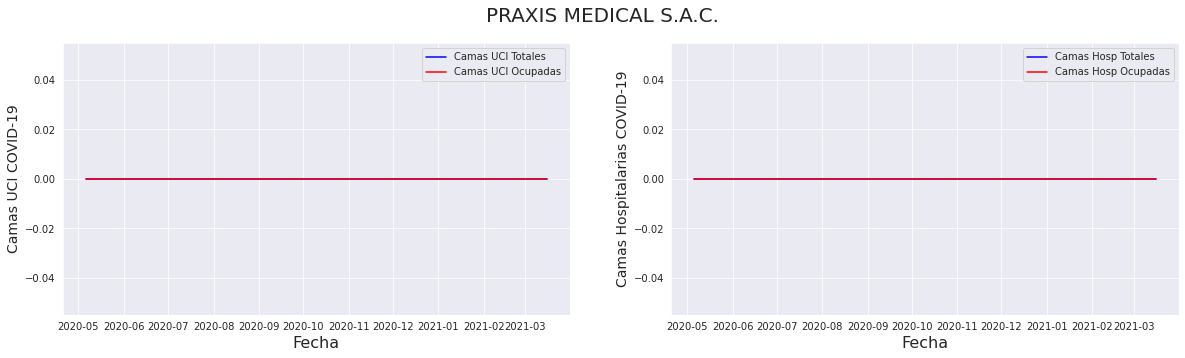

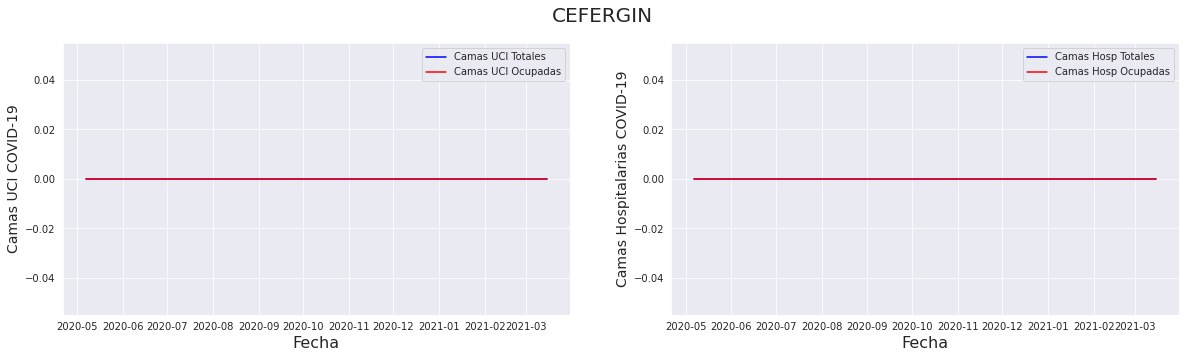

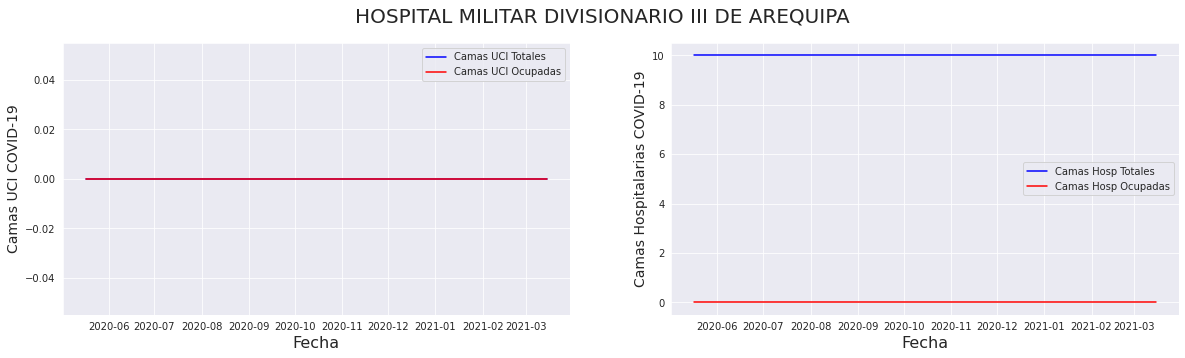

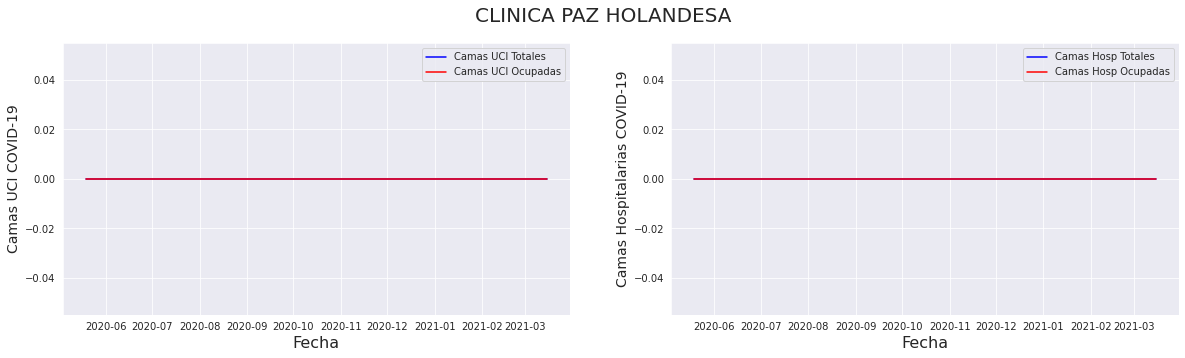

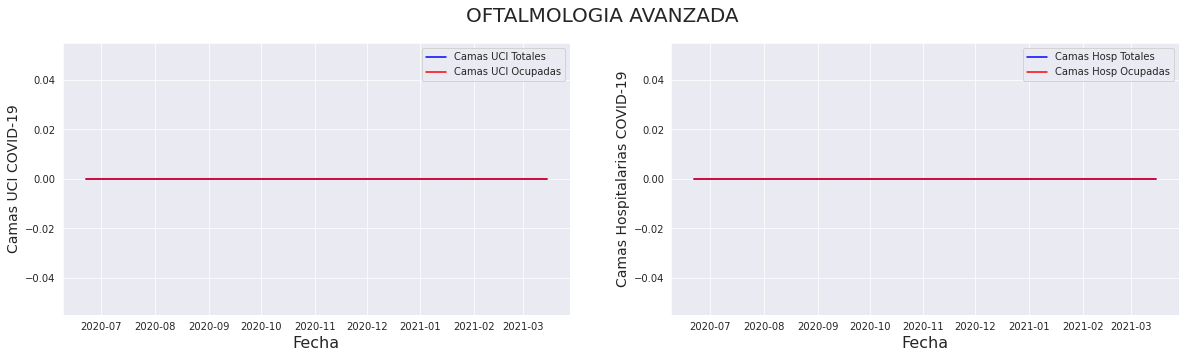

In [ ]:
for institucion in df_arequipa_provincia_sin_duplicados.NOMBRE.unique():
    subplot(institucion)

# Hospitales: Disponibilidad de Camas 

In [ ]:
df_are_pro_sin_dup_hos = df_arequipa_provincia_sin_duplicados[df_arequipa_provincia_sin_duplicados['NOMBRE'].str.startswith('HOSP', na=False)].sort_values('FECHA')
df_are_pro_sin_dup_hos[['INSTITUCION', 'NOMBRE', 'FECHA', 'CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_DISPONIBLES', 'CAMAS_ZC_TOTAL']].sort_values('FECHA').tail(30)

,INSTITUCION,NOMBRE,FECHA,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL
7066,FFAA y PNP,HOSPITAL REGIONAL PNP AREQUIPA,2021-03-10,6,0,6
7067,EsSalud,HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ...,2021-03-10,57,2,59
7070,Gob Regional,HOSPITAL GOYENECHE,2021-03-11,6,0,6
7073,FFAA y PNP,HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA,2021-03-11,0,0,0
7080,EsSalud,HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ...,2021-03-11,57,2,59
7082,FFAA y PNP,HOSPITAL REGIONAL PNP AREQUIPA,2021-03-11,6,0,6
7084,Gob Regional,HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,2021-03-11,8,0,8
7098,Gob Regional,HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,2021-03-12,8,0,8
7096,FFAA y PNP,HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA,2021-03-12,0,0,0
7100,FFAA y PNP,HOSPITAL REGIONAL PNP AREQUIPA,2021-03-12,6,0,6


In [ ]:
df_are_pro_sin_dup_hos_gb = df_are_pro_sin_dup_hos.groupby(['FECHA'])['CAMAS_ZC_DISPONIBLES', 'CAMAS_ZC_OCUPADOS','CAMAS_ZC_TOTAL'].sum()
df_are_pro_sin_dup_hos_gb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,,
2020-04-14,0,2,2
2020-04-17,0,0,0
2020-04-18,0,0,0
2020-04-19,2,12,14
2020-04-20,10,9,19
...,...,...,...
2021-03-11,2,77,79
2021-03-12,7,66,73
2021-03-13,3,76,79


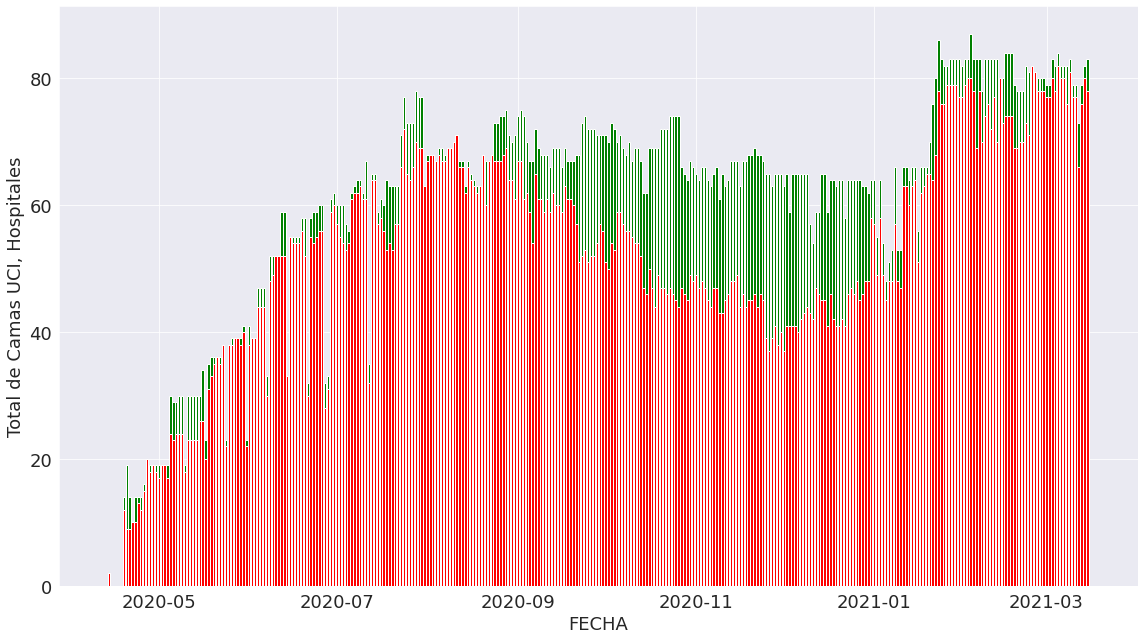

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
ax1.bar(df_are_pro_sin_dup_hos_gb.index, \
        df_are_pro_sin_dup_hos_gb['CAMAS_ZC_OCUPADOS'], color='r',)

ax1.bar(df_are_pro_sin_dup_hos_gb.index, \
        df_are_pro_sin_dup_hos_gb['CAMAS_ZC_DISPONIBLES'], color='g', \
        bottom=df_are_pro_sin_dup_hos_gb['CAMAS_ZC_OCUPADOS'])

ax1.tick_params(labelsize=18)
ax1.set_xlabel('FECHA',fontsize=18)
ax1.set_ylabel('Total de Camas UCI, Hospitales',fontsize=18)
 
fig.tight_layout()

plt.show()
plt.clf()

In [ ]:
df_arequipa_provincia_sin_duplicados_hospitales['CATEGORIA'].unique()

NameError: ignored

NameError: ignored

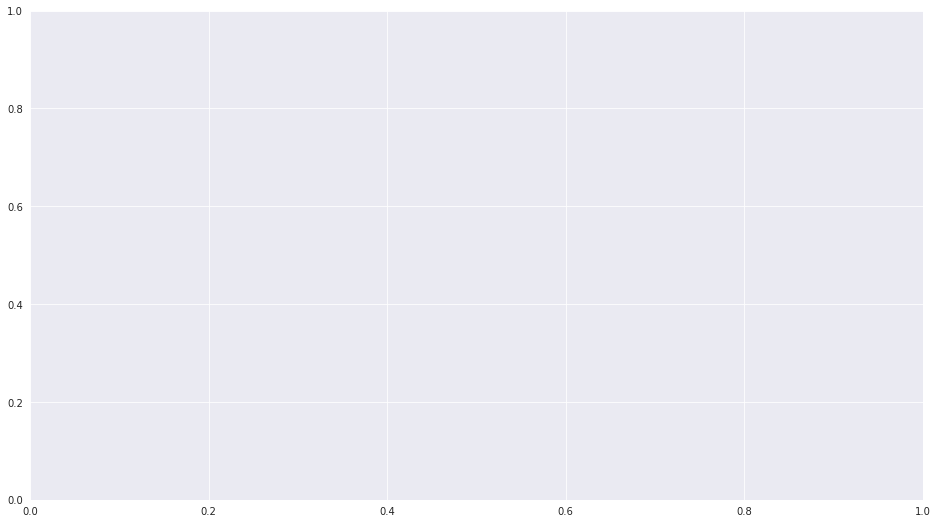

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="CAMAS_ZC_DISPONIBLES",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('CAMAS_ZC_DISPONIBLES', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

NameError: ignored

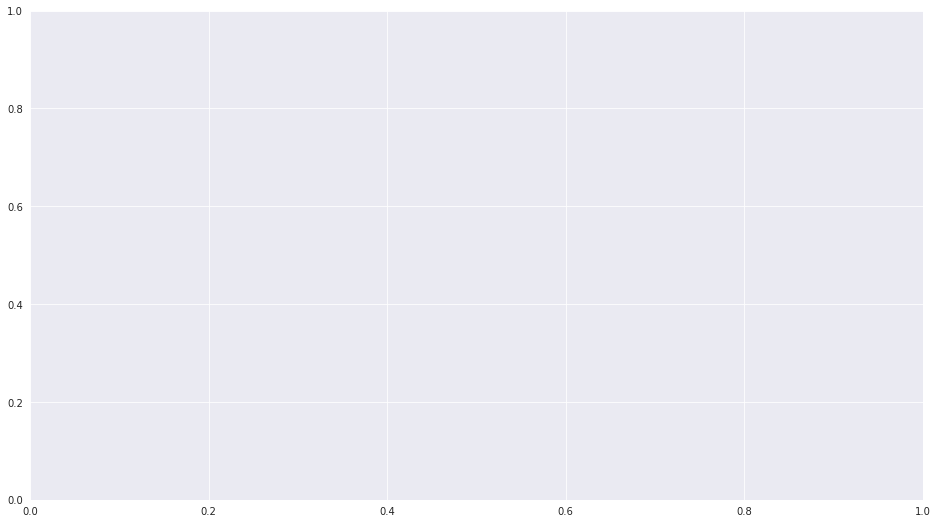

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="CAMAS_ZNC_DISPONIBLE",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('CAMAS_ZNC_DISPONIBLE', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

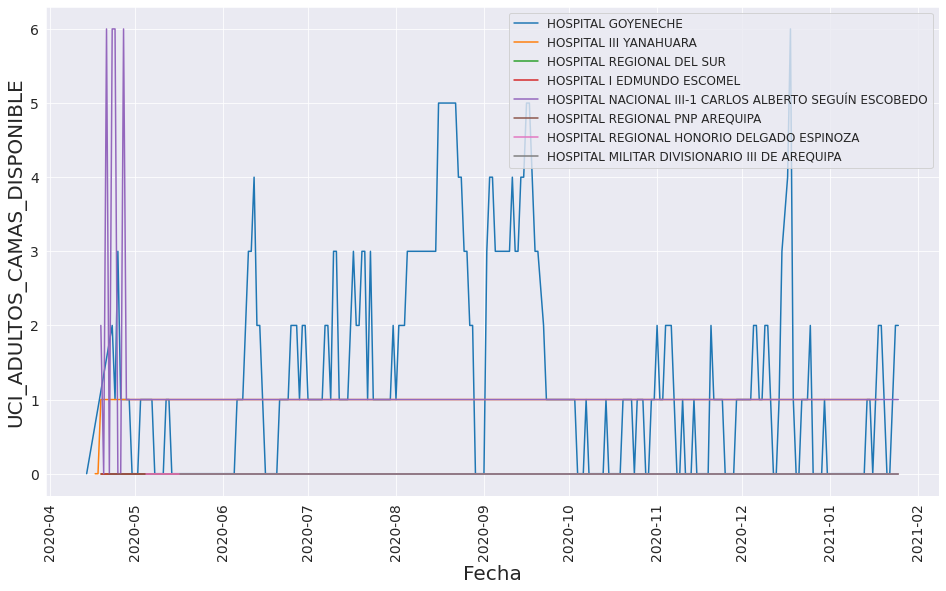

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="UCI_ADULTOS_CAMAS_DISPONIBLE",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('UCI_ADULTOS_CAMAS_DISPONIBLE', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

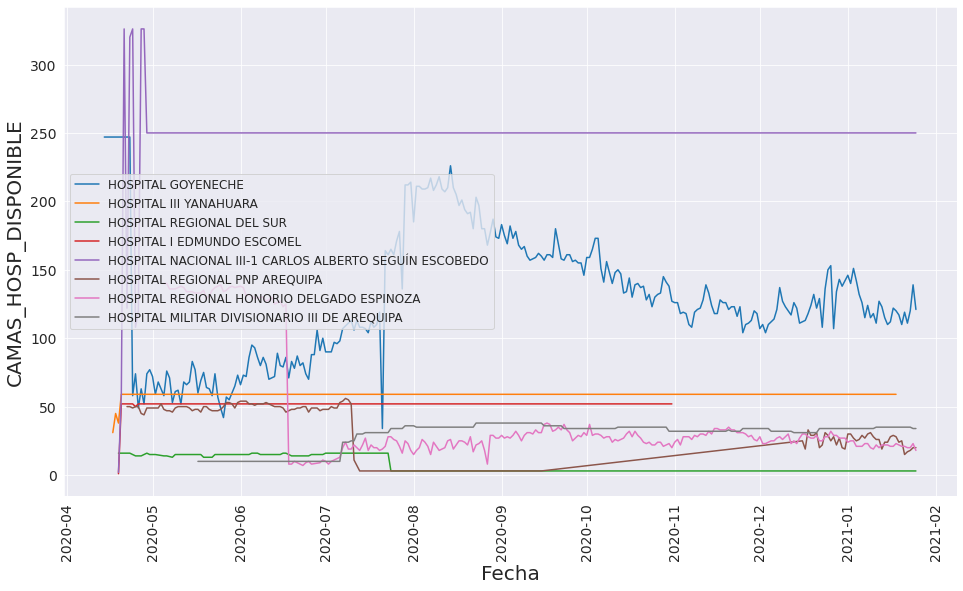

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="CAMAS_HOSP_DISPONIBLE",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('CAMAS_HOSP_DISPONIBLE', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()